In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Sewage Sludge Data Cleaning

In [2]:
ss_treatment = pd.read_excel("sewage_sludge/SS_treatment.xlsx")

In [3]:
ss_treatment.columns = ['Country'] + [year for year in range(2011, 2024) for _ in range(6)]
ss_treatment.set_index("Country", inplace=True)

In [4]:
headers = ss_treatment.columns[:]  
sub_headers_1 = ss_treatment.iloc[0, :].values  # Second row excluding the first column
sub_headers_2 = ss_treatment.iloc[1, :].values  # Third row excluding the first column

# Create a MultiIndex for the columns (excluding the first column)
multi_index = pd.MultiIndex.from_arrays([headers, sub_headers_1, sub_headers_2], names=["Year", "Treatment", "Unit"])
ss_treatment = ss_treatment.iloc[2:]
# Assign MultiIndex to the DataFrame columns
ss_treatment.columns = multi_index  # Combine first column header with the MultiIndex

In [5]:
ss_treatment = ss_treatment.melt(ignore_index=False,  # Preserve the index (Country)
                  var_name=["Year", "Treatment", "Unit"], 
                  value_name="Value")

In [6]:
ss_treatment.reset_index(inplace = True)

In [7]:
ss_treatment =ss_treatment.loc[~((ss_treatment["Country"].isin(['Extra EU countries'])) |(ss_treatment["Country"].isna()))]

In [8]:
country_code = pd.read_csv("/Users/marriyapillais/Desktop/msw_model/FutuRaM_MSWI/data/processed/country_codes.csv")
country_code.loc[country_code['Country']=='EU-27 Member States','Country']='European Union - 27 countries'
country_code.loc[country_code['Country']=='Czech Republic','Country']='Czechia'
country_code.loc[country_code['Country']=='Netherlands','Country']='The Netherlands'

In [9]:
ss_treatment = pd.merge(ss_treatment, country_code[['Country','NUTS_code']],how='left', on='Country')
ss_treatment.rename(columns={'NUTS_code':'LOCATION'},inplace = True)

# Fit Functions

In [10]:
def fit_fun(x,fit,deg):
    #for the specified parameters, this function returns the value from the fit  
    if deg==2:
        y = fit[2]+fit[1]*x+fit[0]*x*x
    elif deg ==1:
        y = fit[1]+fit[0]*x
    #for i in range(deg+1):
    #    y=y+(fit[i]*np.power(x,(deg-i)))
    return(y)

# Plots for all countries together

In [11]:
import matplotlib.pyplot as plt

## SS vs Population

### Adding population data

In [17]:
pop = pd.read_csv("/Users/marriyapillais/Desktop/msw_model/FutuRaM_MSWI/data/processed/population_projections_cleaned.csv")
pop_his=pop.loc[pop["TIME"].isin(range(2010,2023))]

In [18]:
ss_treatment = pd.merge(ss_treatment,pop[["LOCATION",'TIME','POP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
ss_treatment.drop(columns = ['Country','TIME'], inplace = True)

In [19]:
ss_total = ss_treatment.loc[ss_treatment['Treatment']=='Total']
ss_total.reset_index(inplace=True)

In [217]:
# Following values contain NaN

#ss_total.loc[((ss_total["POP"].isna())|(ss_total['Value'].isna()))]

#This includes total for EU27

In [15]:
#Remove NaNs
ss_total = ss_total.loc[~((ss_total["POP"].isna())|(ss_total['Value'].isna()))]

### Plotting

In [17]:
log_fit = np.polyfit(np.log(pd.to_numeric(ss_total['POP'])), pd.to_numeric(ss_total['Value']), 1)
lin_fit = np.polyfit(pd.to_numeric(ss_total['POP']), pd.to_numeric(ss_total['Value']), 1)
log_fit_2 = np.polyfit(np.log(pd.to_numeric(ss_total['POP'])), pd.to_numeric(ss_total['Value']), 2)

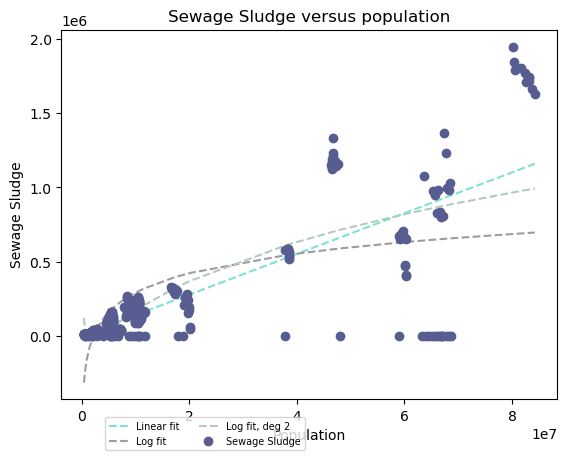

In [18]:
x = pd.to_numeric(ss_total['POP'].sort_values())
fig = plt.plot(x,fit_fun(x,lin_fit,1),'--',label='Linear fit', color='#7DE2D1')
plt.plot(x,fit_fun(np.log(x),log_fit,1),'--',label='Log fit', color='#9F9AA4')
plt.plot(x,fit_fun(np.log(x),log_fit_2,2),'--',label='Log fit, deg 2', color='#B5C9C3')
plt.plot(ss_total['POP'],ss_total['Value'],'o', label='Sewage Sludge', color = '#575D90')
plt.xlabel('Population')
plt.ylabel('Sewage Sludge')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 7})
plt.title('Sewage Sludge versus population')
plt.show()

In [19]:
ss_plotting = ss_total[ss_total['Year']!=2023]
ss_plotting['POP']=pd.to_numeric(ss_plotting['POP'])

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_59102/3441040325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_plotting['POP']=pd.to_numeric(ss_plotting['POP'])


In [28]:
ss_plotting[ss_plotting['Value']==0]

index  Year Treatment                 Unit Value LOCATION         POP
28     183  2011     Total  SS in DM\n[Mg/year]     0      GBR  63285000.0
90     555  2013     Total  SS in DM\n[Mg/year]     0      GBR  64106000.0
121    741  2014     Total  SS in DM\n[Mg/year]     0      GBR  64597000.0
152    927  2015     Total  SS in DM\n[Mg/year]     0      GBR  65110000.0
183   1113  2016     Total  SS in DM\n[Mg/year]     0      GBR  65648000.0
214   1299  2017     Total  SS in DM\n[Mg/year]     0      GBR  66040000.0
245   1485  2018     Total  SS in DM\n[Mg/year]     0      GBR  66436000.0
276   1671  2019     Total  SS in DM\n[Mg/year]     0      GBR  66797000.0
307   1857  2020     Total  SS in DM\n[Mg/year]     0      GBR  67081000.0
338   2043  2021     Total  SS in DM\n[Mg/year]     0      GBR  67026000.0
369   2229  2022     Total  SS in DM\n[Mg/year]     0      GBR  67791000.0

In [29]:
lin_fit = np.polyfit(pd.to_numeric(ss_total['POP']), pd.to_numeric(ss_total['Value']), 1)

/Users/marriyapillais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


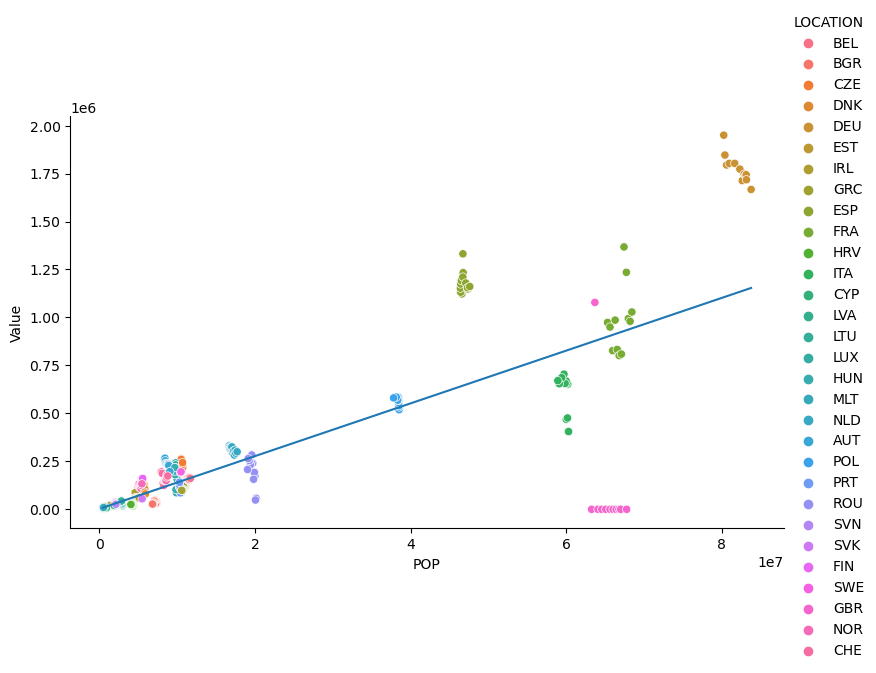

In [30]:
g = sns.relplot(data=ss_plotting, x='POP', y='Value', hue='LOCATION', aspect=1.61)
ax = g.ax
sns.lineplot(x=ss_plotting['POP'].sort_values(),y=fit_fun(ss_plotting['POP'].sort_values(),lin_fit,1), legend =False)
#for i, row in ss_plotting.iterrows():
#    ax.text(row['POP'], row['Value'], row['LOCATION'], fontsize=9, verticalalignment='bottom')

plt.show()

In [174]:
# Compute predicted values using the regression function
ss_total['Predicted'] = fit_fun(pd.to_numeric(ss_total['POP']), lin_fit, 1)

# Calculate deviation percentage
ss_total['Deviation (%)'] = abs(ss_total['Value'] - ss_total['Predicted']) / ss_total['Value'] * 100




In [148]:
# Filter rows where deviation exceeds 20%
outliers = ss_plotting[ss_plotting['Deviation (%)'] > 50]
# Select relevant columns
outliers_list = outliers[['LOCATION', 'Year', 'POP', 'Value', 'Predicted', 'Deviation (%)']]

# Display the results
print(outliers_list)

    LOCATION  Year         POP       Value     Predicted Deviation (%)
2        BGR  2011   7348328.0       31200  1.146005e+05     267.30917
6        EST  2011   1329660.0       18100  8.196674e+03     54.714509
11       HRV  2011   4361212.0    18004.99  6.179136e+04    243.190185
12       ITA  2011  60026800.0    469000.0  1.045901e+06    123.006616
13       CYP  2011    850882.0        6810 -2.676229e+02    103.929852
..       ...   ...         ...         ...           ...           ...
353      ITA  2022  58941600.0  670550.175  1.026716e+06     53.115435
354      CYP  2022    908945.0        8310  7.588705e+02     90.867985
357      LUX  2022    655275.0       12520 -3.725751e+03    129.758396
359      MLT  2022    523281.0        9260 -6.059268e+03    165.434857
364      ROU  2022  19042460.0      207220  3.213405e+05     55.072167

[111 rows x 6 columns]


In [116]:
outliers_list['LOCATION'].unique()

array(['BGR', 'EST', 'HRV', 'ITA', 'CYP', 'LTU', 'LUX', 'MLT', 'PRT',
       'ROU', 'GRC', 'HUN', 'SVK'], dtype=object)

## SS/cap vs GDP/cap

In [11]:
gdp_cap = pd.read_csv("/Users/marriyapillais/Desktop/msw_model/FutuRaM_MSWI/data/processed/gdp_percap_projections_cleaned.csv")
gdp_cap_his=gdp_cap.loc[gdp_cap["TIME"].isin(range(2010,2023))]

In [12]:
ss_treatment = pd.merge(ss_treatment,gdp_cap[["LOCATION",'TIME','GDPVD_CAP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
ss_treatment.drop(columns = ['TIME'], inplace = True)

In [13]:
ss_total = ss_treatment.loc[ss_treatment['Treatment']=='Total']
ss_total.reset_index(inplace=True)

In [20]:
#Remove NaNs (in the entries EU27_2020)
ss_total = ss_total.loc[~((ss_total["POP"].isna())|(ss_total['Value'].isna()))]

In [15]:
ss_total = ss_total.loc[ss_total['Value']!=0]

In [21]:
ss_total['SS/cap']=ss_total['Value']/ss_total['POP']

In [26]:
log_fit = np.polyfit(np.log(pd.to_numeric(ss_total['GDPVD_CAP'])), pd.to_numeric(ss_total['SS/cap']), 1)
lin_fit = np.polyfit(pd.to_numeric(ss_total['GDPVD_CAP']), pd.to_numeric(ss_total['SS/cap']), 1)
log_fit_2 = np.polyfit(np.log(pd.to_numeric(ss_total['GDPVD_CAP'])), pd.to_numeric(ss_total['SS/cap']), 2)

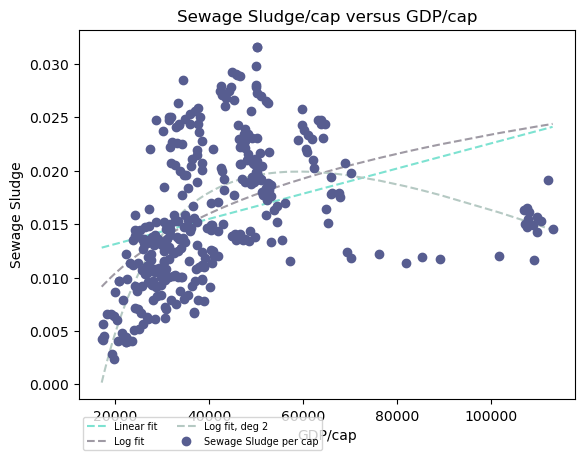

In [27]:
x = pd.to_numeric(ss_total['GDPVD_CAP'].sort_values())
fig = plt.plot(x,fit_fun(x,lin_fit,1),'--',label='Linear fit', color='#7DE2D1')
plt.plot(x,fit_fun(np.log(x),log_fit,1),'--',label='Log fit', color='#9F9AA4')
plt.plot(x,fit_fun(np.log(x),log_fit_2,2),'--',label='Log fit, deg 2', color='#B5C9C3')
plt.plot(ss_total['GDPVD_CAP'],ss_total['SS/cap'],'o', label='Sewage Sludge per cap', color = '#575D90')
plt.xlabel('GDP/cap')
plt.ylabel('Sewage Sludge')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 7})
plt.title('Sewage Sludge/cap versus GDP/cap')
plt.show()

In [ ]:
#ss_total.sort_values('SS/cap').tail(50)
# ISL is the outlier

### Removing ISL from previous plots

In [200]:
#Remove ISL
ss_total = ss_total.loc[~(ss_total["LOCATION"]=='ISL')]

In [209]:
#log_fit = np.polyfit(np.log(pd.to_numeric(ss_total['POP'])), pd.to_numeric(ss_total['Value']), 1)
lin_fit = np.polyfit(pd.to_numeric(ss_total['POP']), pd.to_numeric(ss_total['Value']), 1)
#log_fit_2 = np.polyfit(np.log(pd.to_numeric(ss_total['POP'])), pd.to_numeric(ss_total['Value']), 2)

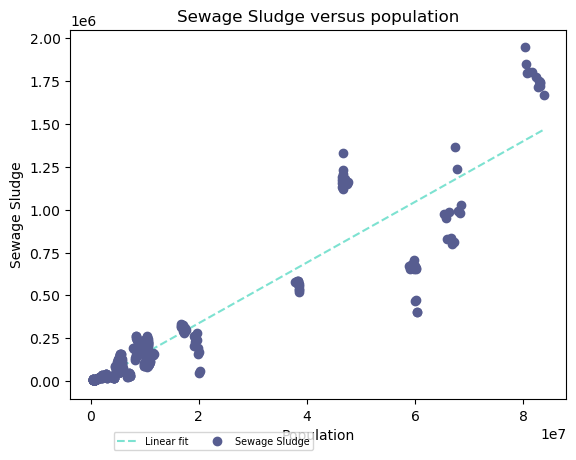

In [210]:
x = pd.to_numeric(ss_total['POP'].sort_values())
fig = plt.plot(x,fit_fun(x,lin_fit,1),'--',label='Linear fit', color='#7DE2D1')
#plt.plot(x,fit_fun(np.log(x),log_fit,1),'--',label='Log fit', color='#9F9AA4')
#plt.plot(x,fit_fun(np.log(x),log_fit_2,2),'--',label='Log fit, deg 2', color='#B5C9C3')
plt.plot(ss_total['POP'],ss_total['Value'],'o', label='Sewage Sludge', color = '#575D90')
plt.xlabel('Population')
plt.ylabel('Sewage Sludge')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 7})
plt.title('Sewage Sludge versus population')
plt.show()

In [203]:
log_fit = np.polyfit(np.log(pd.to_numeric(ss_total['GDPVD_CAP'])), pd.to_numeric(ss_total['SS/cap']), 1)
lin_fit = np.polyfit(pd.to_numeric(ss_total['GDPVD_CAP']), pd.to_numeric(ss_total['SS/cap']), 1)
log_fit_2 = np.polyfit(np.log(pd.to_numeric(ss_total['GDPVD_CAP'])), pd.to_numeric(ss_total['SS/cap']), 2)

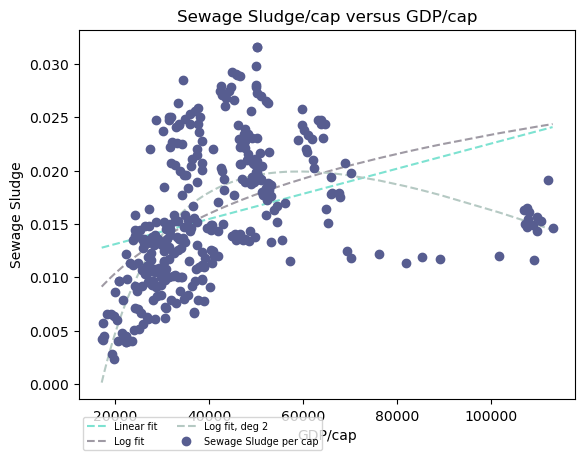

In [204]:
x = pd.to_numeric(ss_total['GDPVD_CAP'].sort_values())
fig = plt.plot(x,fit_fun(x,lin_fit,1),'--',label='Linear fit', color='#7DE2D1')
plt.plot(x,fit_fun(np.log(x),log_fit,1),'--',label='Log fit', color='#9F9AA4')
plt.plot(x,fit_fun(np.log(x),log_fit_2,2),'--',label='Log fit, deg 2', color='#B5C9C3')
plt.plot(ss_total['GDPVD_CAP'],ss_total['SS/cap'],'o', label='Sewage Sludge per cap', color = '#575D90')
plt.xlabel('GDP/cap')
plt.ylabel('Sewage Sludge')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 7})
plt.title('Sewage Sludge/cap versus GDP/cap')
plt.show()

# Plots for individual countries

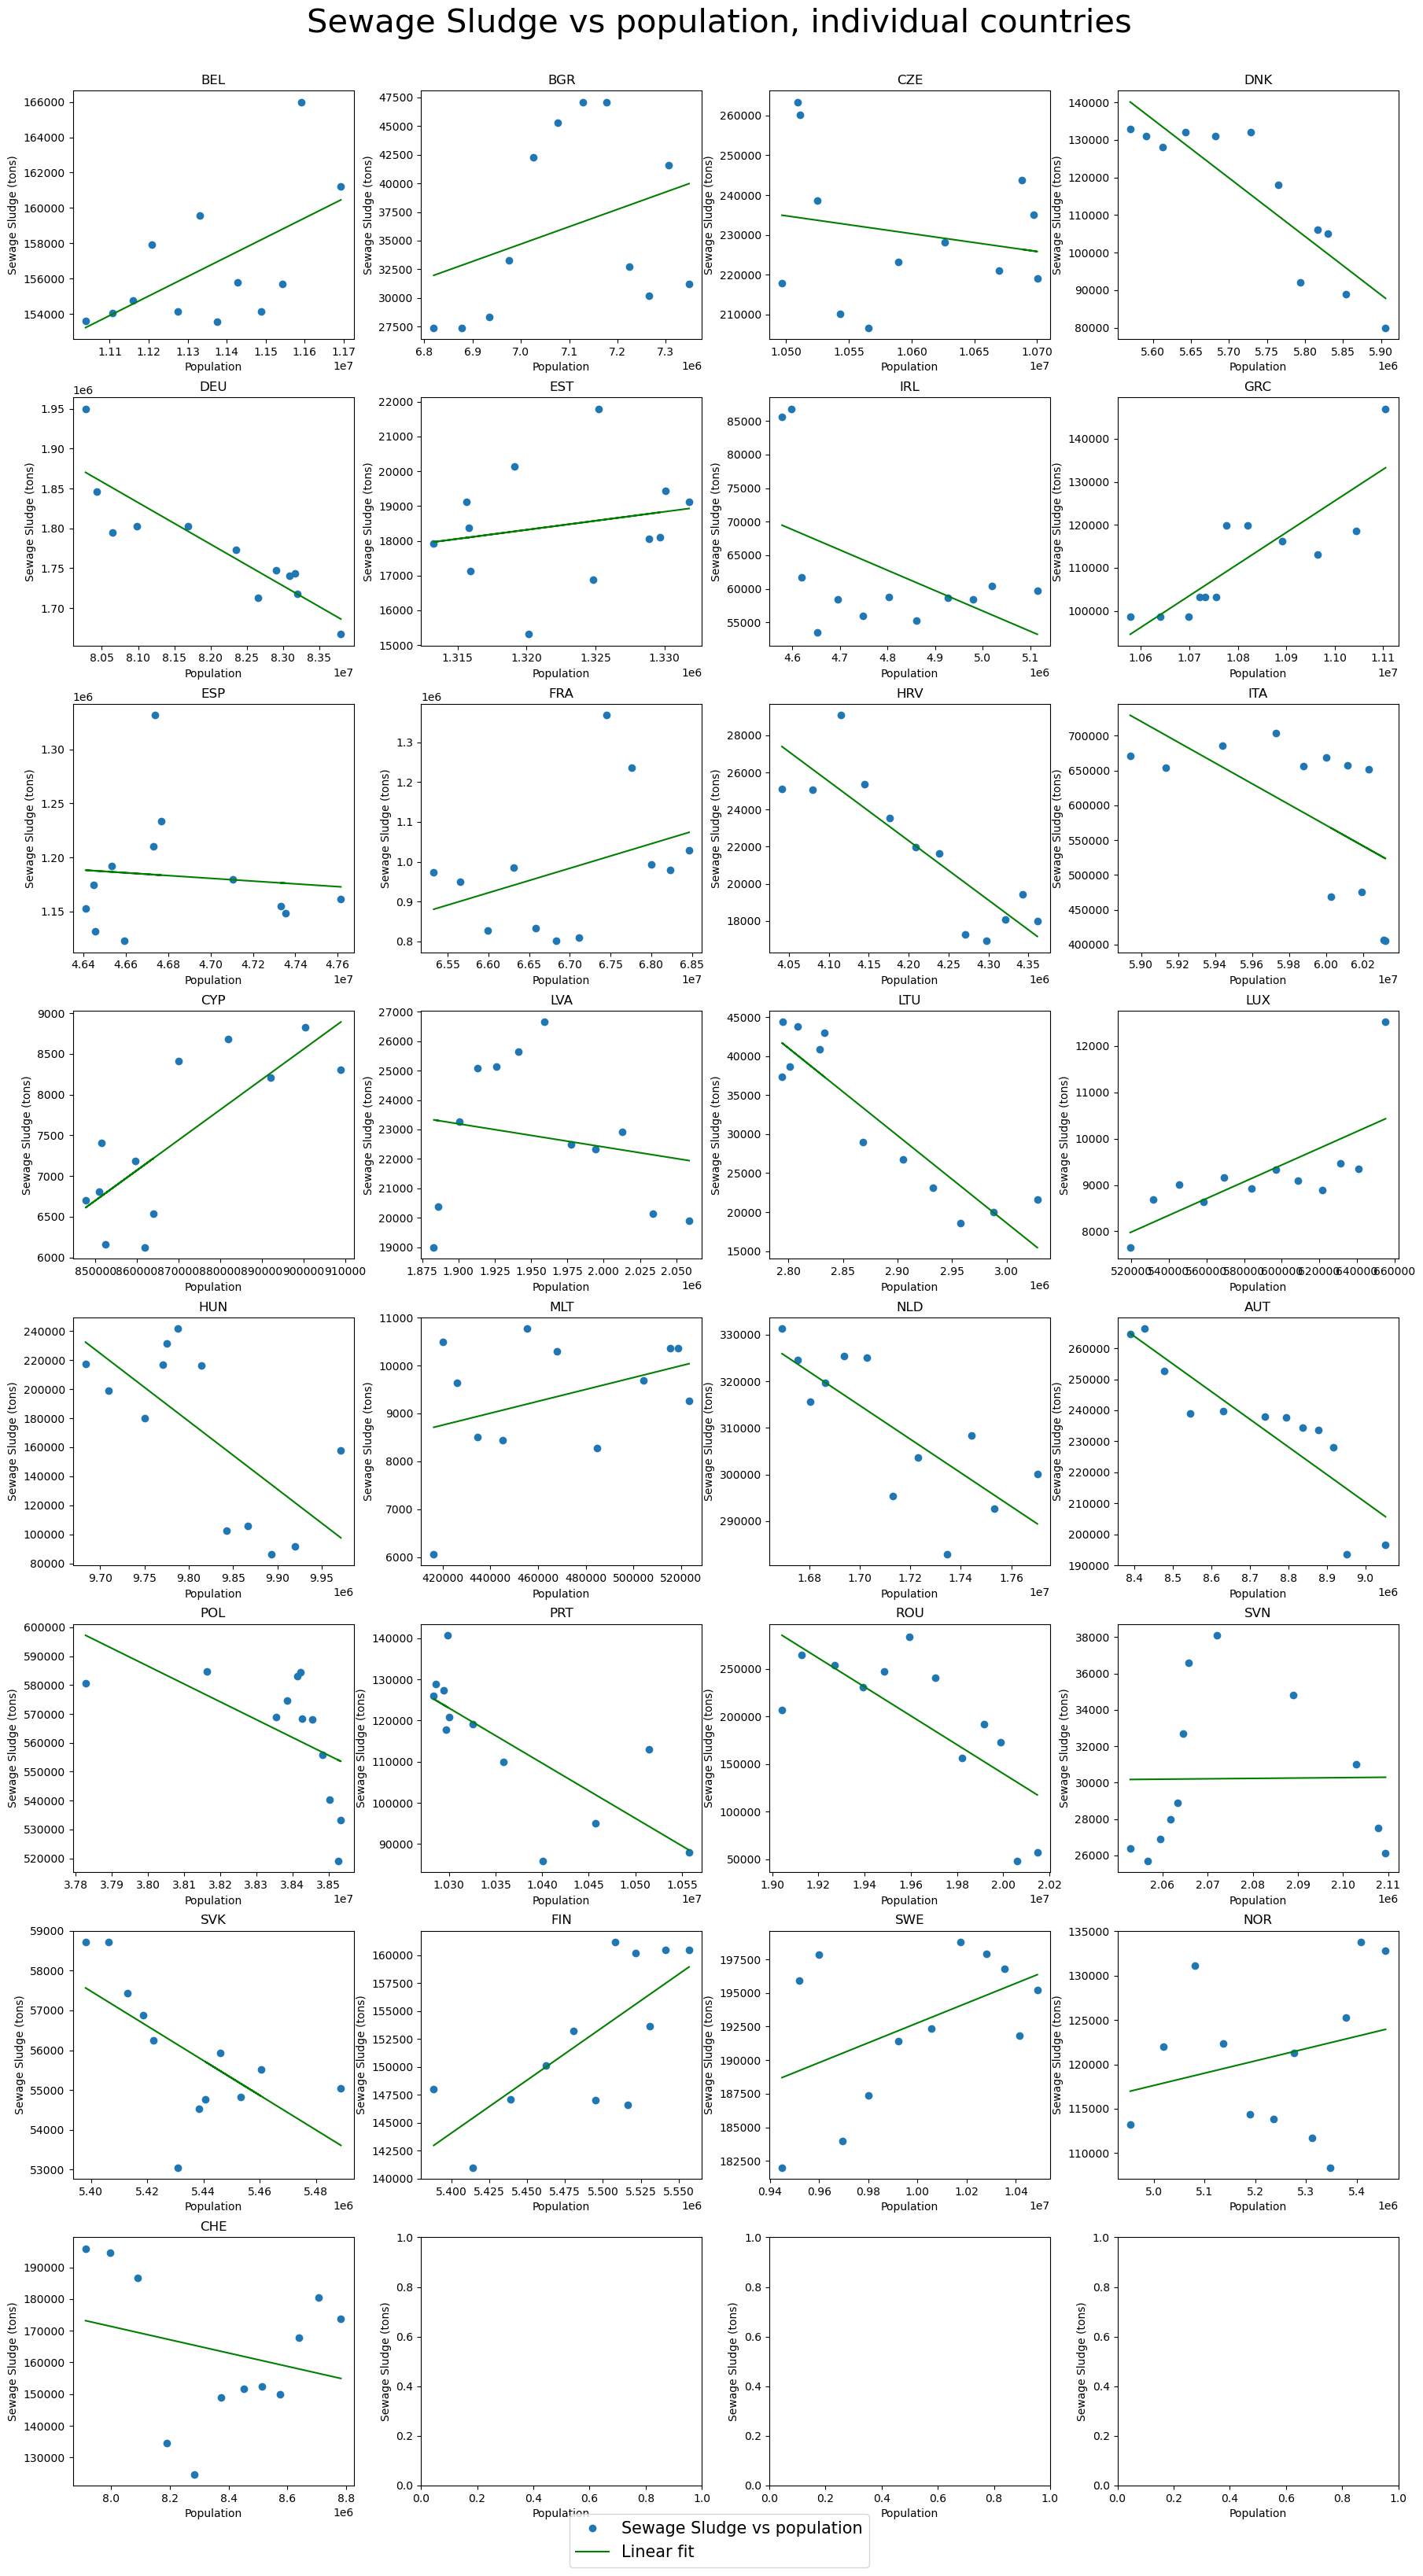

In [68]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Sewage Sludge vs population', 'Linear fit']

i=0
for region in ss_total['LOCATION'].unique():
    reg_data = ss_total.loc[ss_total['LOCATION']==region]
    lines = axs[i].plot(pd.to_numeric(reg_data['POP']),pd.to_numeric(reg_data['Value']),'o', label='Sewage sludge vs pop', color = '#1f77b4')
    legend_handles.extend(lines)
    linear_fit = np.polyfit(pd.to_numeric(reg_data['POP']), pd.to_numeric(reg_data['Value']), 1)
    log_fit = np.polyfit(np.log(pd.to_numeric(reg_data['POP'])), pd.to_numeric(reg_data['Value']), 1)
    #years = np.arange(2010,2051)
    
    lines = axs[i].plot(pd.to_numeric(reg_data['POP']),fit_fun(pd.to_numeric(reg_data['POP']), linear_fit, 1),'-', label='Linear fit', color = 'green')
    legend_handles.extend(lines)

    #lines = axs[i].plot(pd.to_numeric(reg_data['POP']),fit_fun(np.log(pd.to_numeric(reg_data['POP'])), log_fit, 1),'-', label='Log fit', color = 'orange')
    #legend_handles.extend(lines)
   
    #Setting limits of y axis
    #y_min = min(fit_fun(reg_data['POP'], linear_fit).min(), reg_data['Value'].min())
    #y_max = max(fit_fun(reg_data['POP'], linear_fit), reg_data['Value'].max())
    #padding = (y_max - y_min) * 0.2  
    #axs[i].set_ylim(y_min - padding, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Population')
    ax.set_ylabel('Sewage Sludge (tons)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge vs population, individual countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

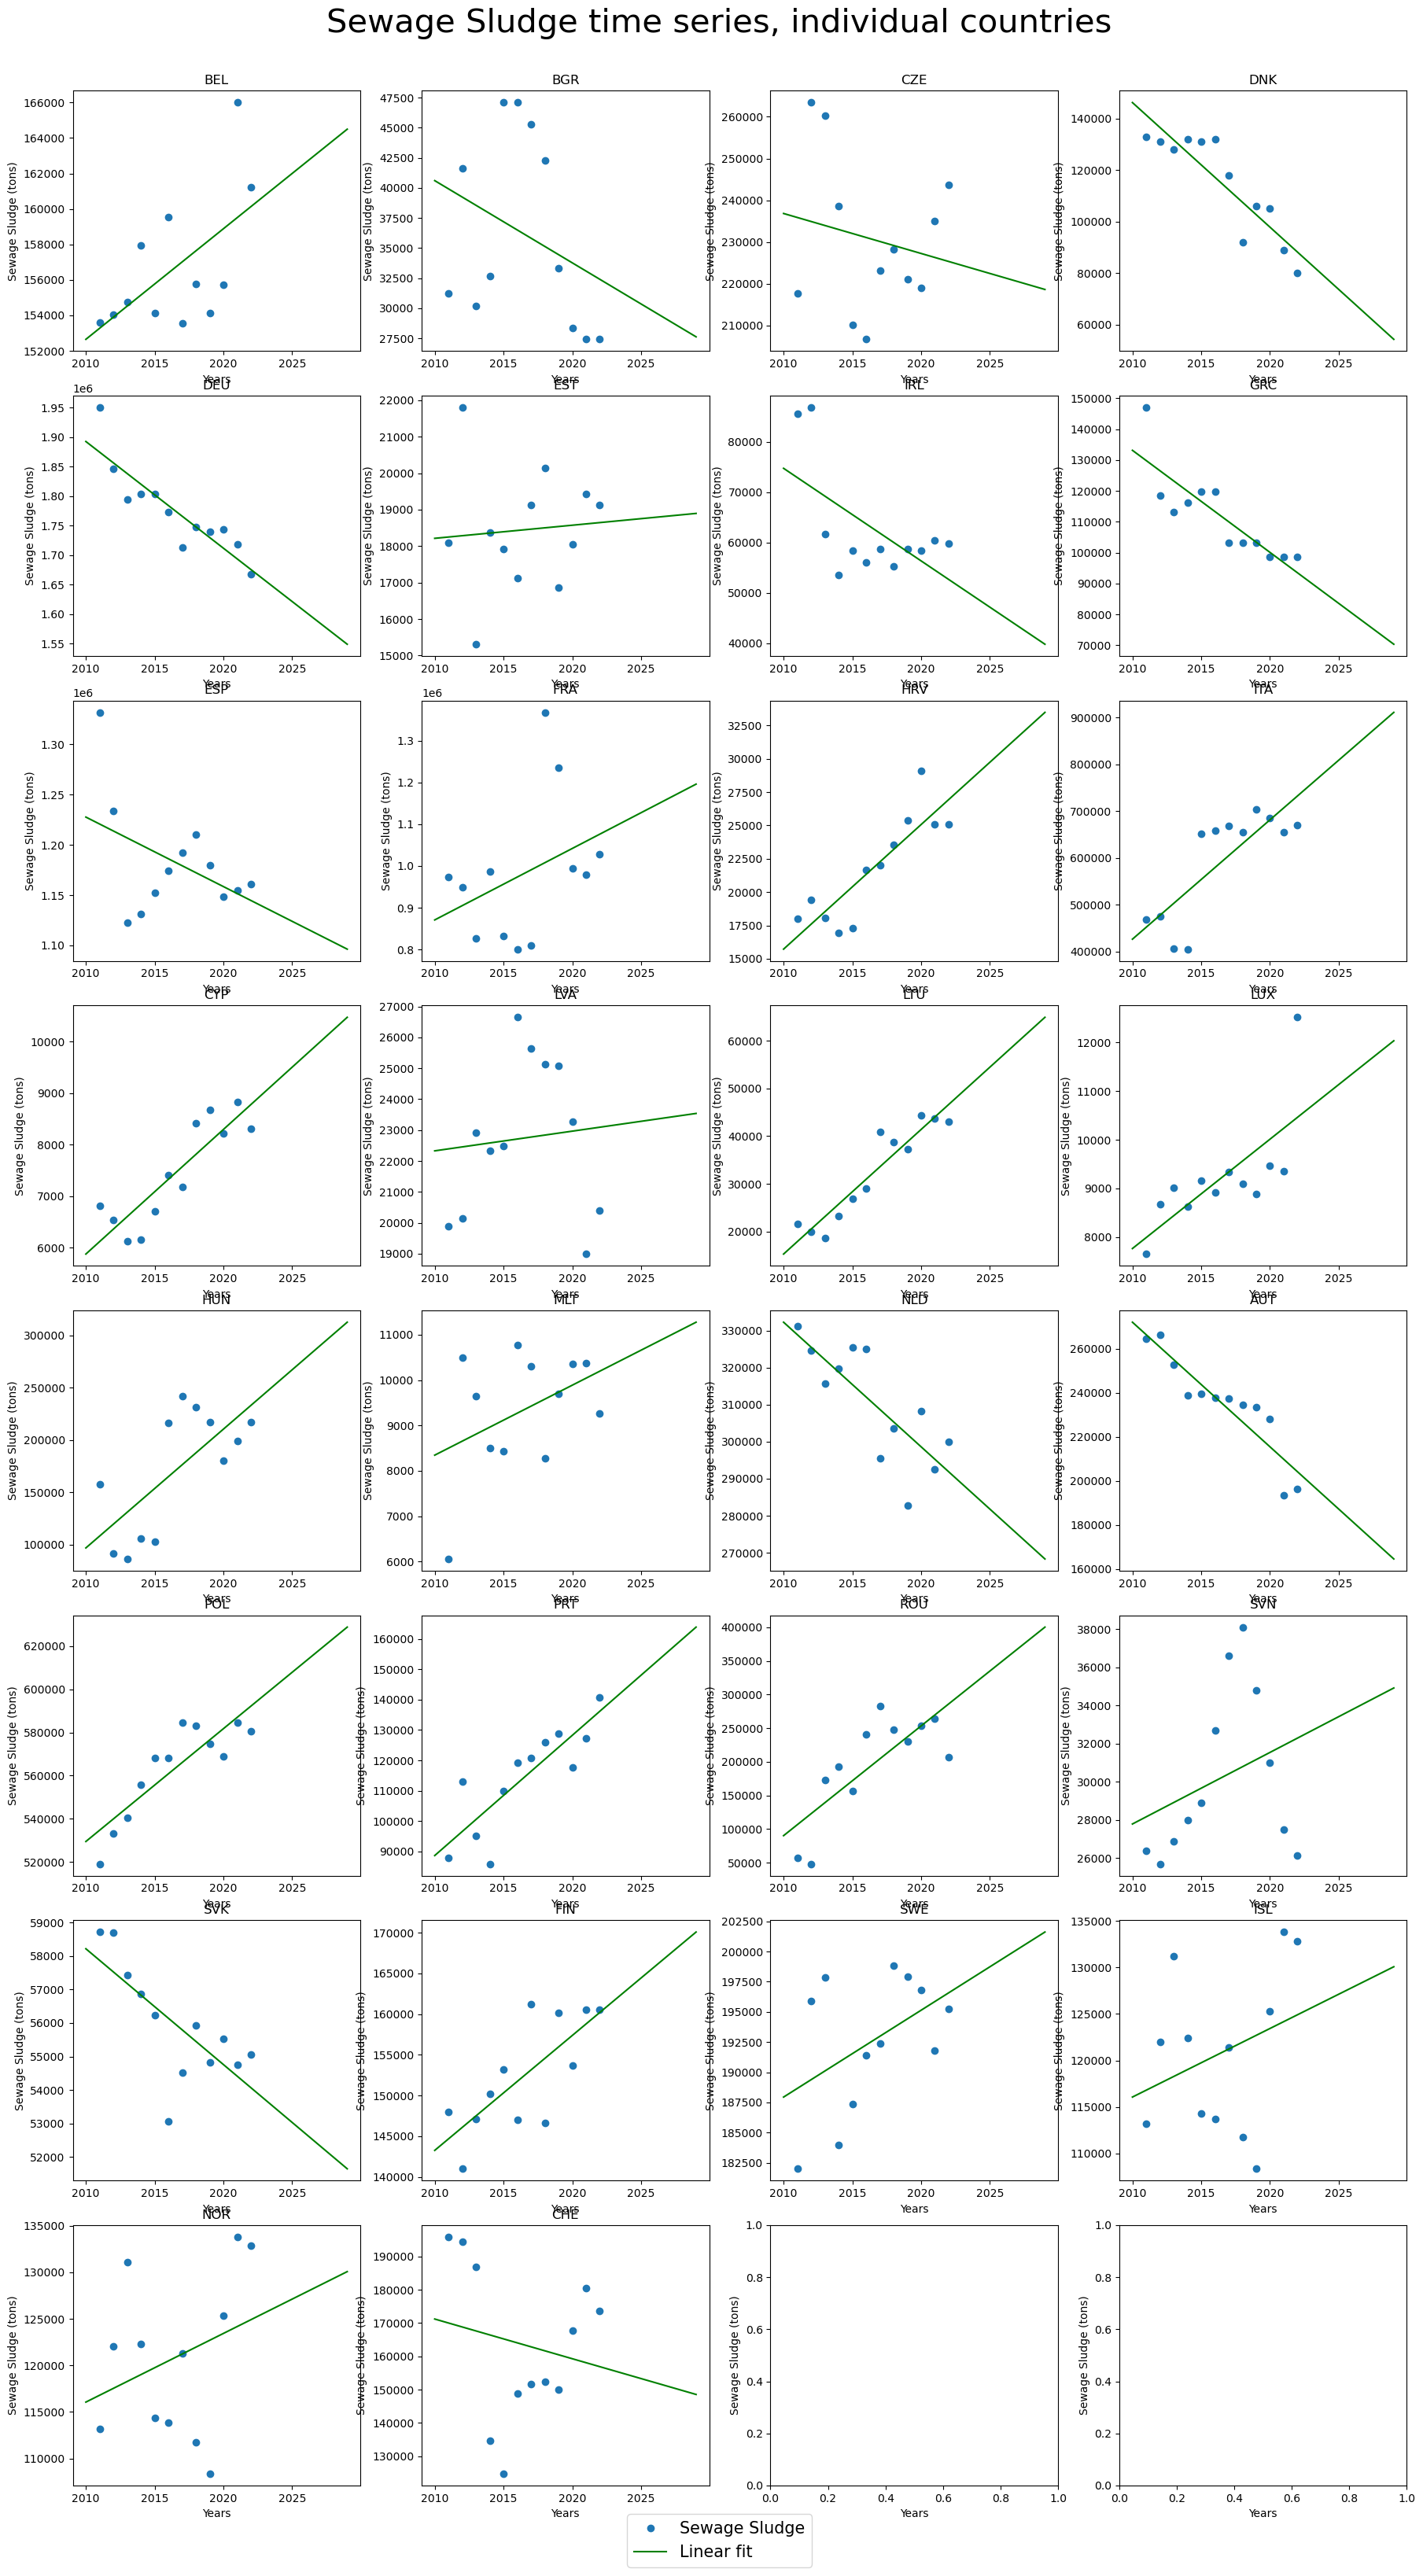

In [41]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Sewage Sludge', 'Linear fit']

i=0
for region in ss_total['LOCATION'].unique():
    reg_data = ss_total.loc[ss_total['LOCATION']==region]
    lines = axs[i].plot(pd.to_numeric(reg_data['Year']),pd.to_numeric(reg_data['Value']),'o', label='Sewage sludge', color = '#1f77b4')
    legend_handles.extend(lines)
    linear_fit = np.polyfit(pd.to_numeric(reg_data['Year']), pd.to_numeric(reg_data['Value']), 1)
    log_fit = np.polyfit(np.log(pd.to_numeric(reg_data['Year'])), pd.to_numeric(reg_data['Value']), 1)
    years = np.arange(2010,2030)
    lines = axs[i].plot(years,fit_fun(years, linear_fit, 1),'-', label='Linear fit', color = 'green')
    legend_handles.extend(lines)

    #lines = axs[i].plot(pd.to_numeric(reg_data['POP']),fit_fun(np.log(pd.to_numeric(reg_data['POP'])), log_fit, 1),'-', label='Log fit', color = 'orange')
    #legend_handles.extend(lines)
   
    #Setting limits of y axis
    #y_min = min(fit_fun(reg_data['POP'], linear_fit).min(), reg_data['Value'].min())
    #y_max = max(fit_fun(reg_data['POP'], linear_fit), reg_data['Value'].max())
    #padding = (y_max - y_min) * 0.2  
    #axs[i].set_ylim(y_min - padding, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Years')
    ax.set_ylabel('Sewage Sludge (tons)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge time series, individual countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

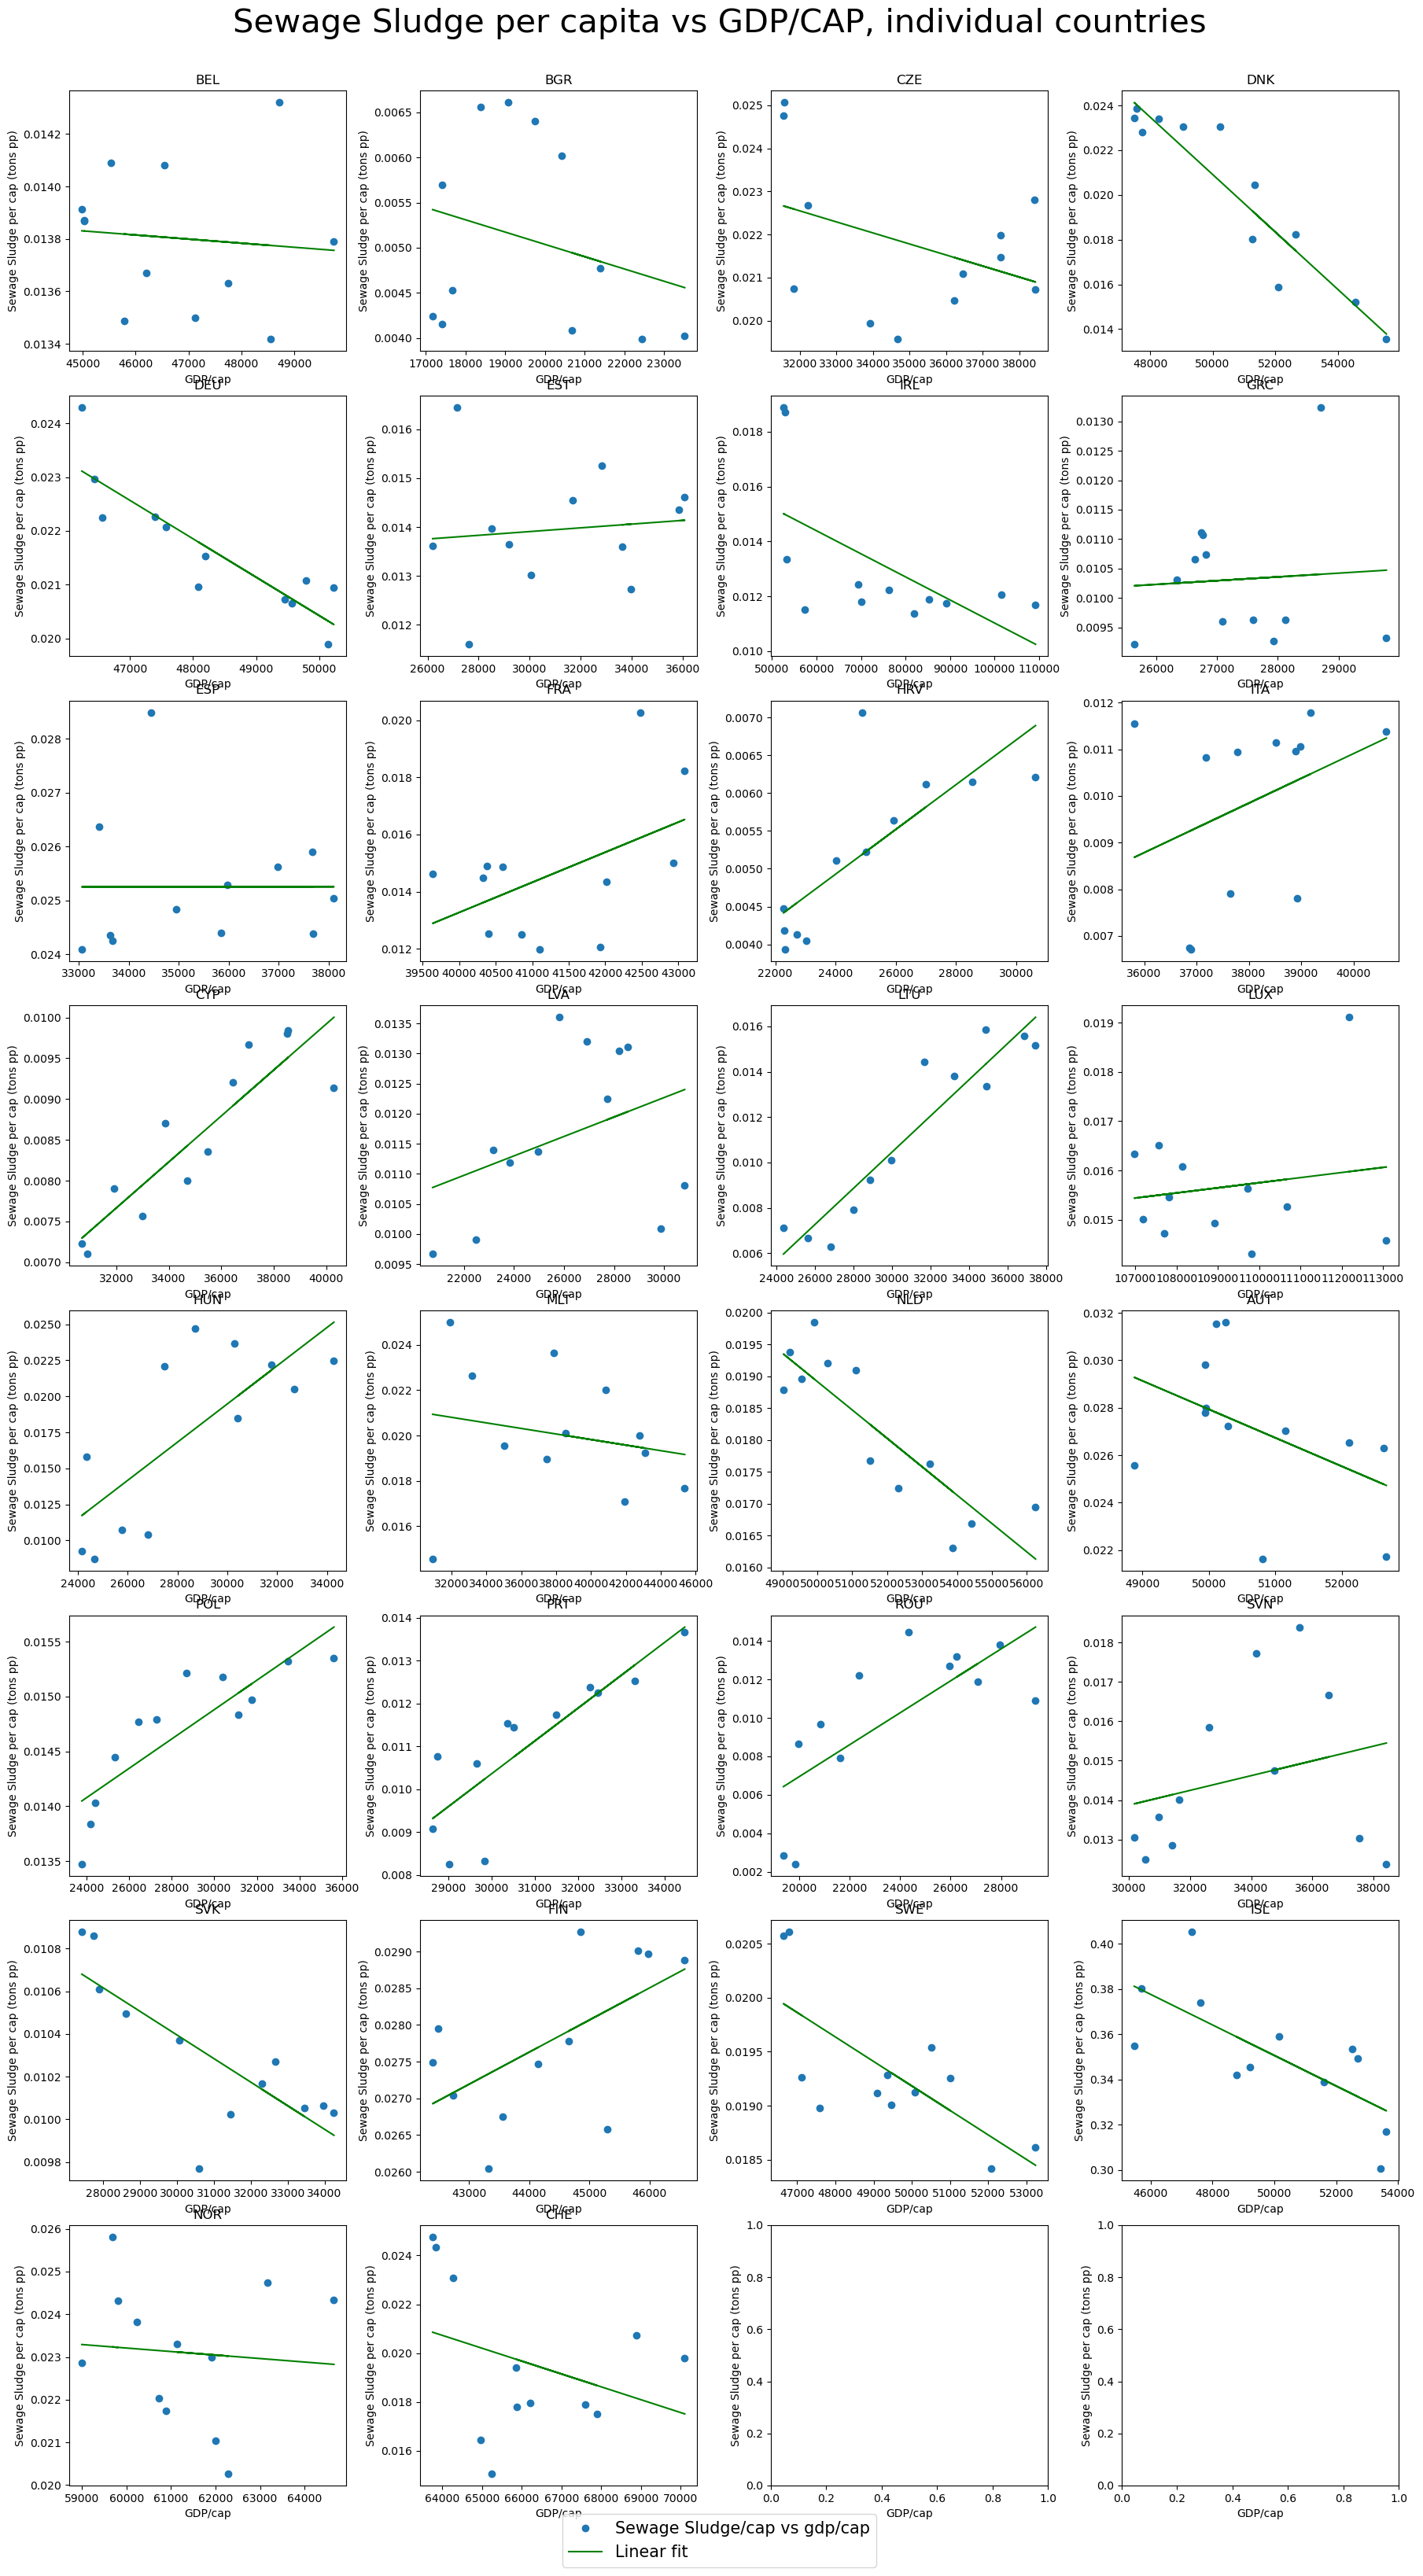

In [44]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Sewage Sludge/cap vs gdp/cap', 'Linear fit']

i=0
for region in ss_total['LOCATION'].unique():
    reg_data = ss_total.loc[ss_total['LOCATION']==region]
    lines = axs[i].plot(pd.to_numeric(reg_data['GDPVD_CAP']),pd.to_numeric(reg_data['SS/cap']),'o', label='Sewage sludge per cap vs gdp/cap', color = '#1f77b4')
    legend_handles.extend(lines)
    linear_fit = np.polyfit(pd.to_numeric(reg_data['GDPVD_CAP']), pd.to_numeric(reg_data['SS/cap']), 1)
    log_fit = np.polyfit(np.log(pd.to_numeric(reg_data['GDPVD_CAP'])), pd.to_numeric(reg_data['SS/cap']), 1)
    #years = np.arange(2010,2051)
    
    lines = axs[i].plot(pd.to_numeric(reg_data['GDPVD_CAP']),fit_fun(pd.to_numeric(reg_data['GDPVD_CAP']), linear_fit, 1),'-', label='Linear fit', color = 'green')
    legend_handles.extend(lines)

    #lines = axs[i].plot(pd.to_numeric(reg_data['POP']),fit_fun(np.log(pd.to_numeric(reg_data['POP'])), log_fit, 1),'-', label='Log fit', color = 'orange')
    #legend_handles.extend(lines)
   
    #Setting limits of y axis
    #y_min = min(fit_fun(reg_data['POP'], linear_fit).min(), reg_data['Value'].min())
    #y_max = max(fit_fun(reg_data['POP'], linear_fit), reg_data['Value'].max())
    #padding = (y_max - y_min) * 0.2  
    #axs[i].set_ylim(y_min - padding, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('GDP/cap')
    ax.set_ylabel('Sewage Sludge per cap (tons pp)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge per capita vs GDP/CAP, individual countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

# Projections

## Linear fit SS vs Pop (for all countries)

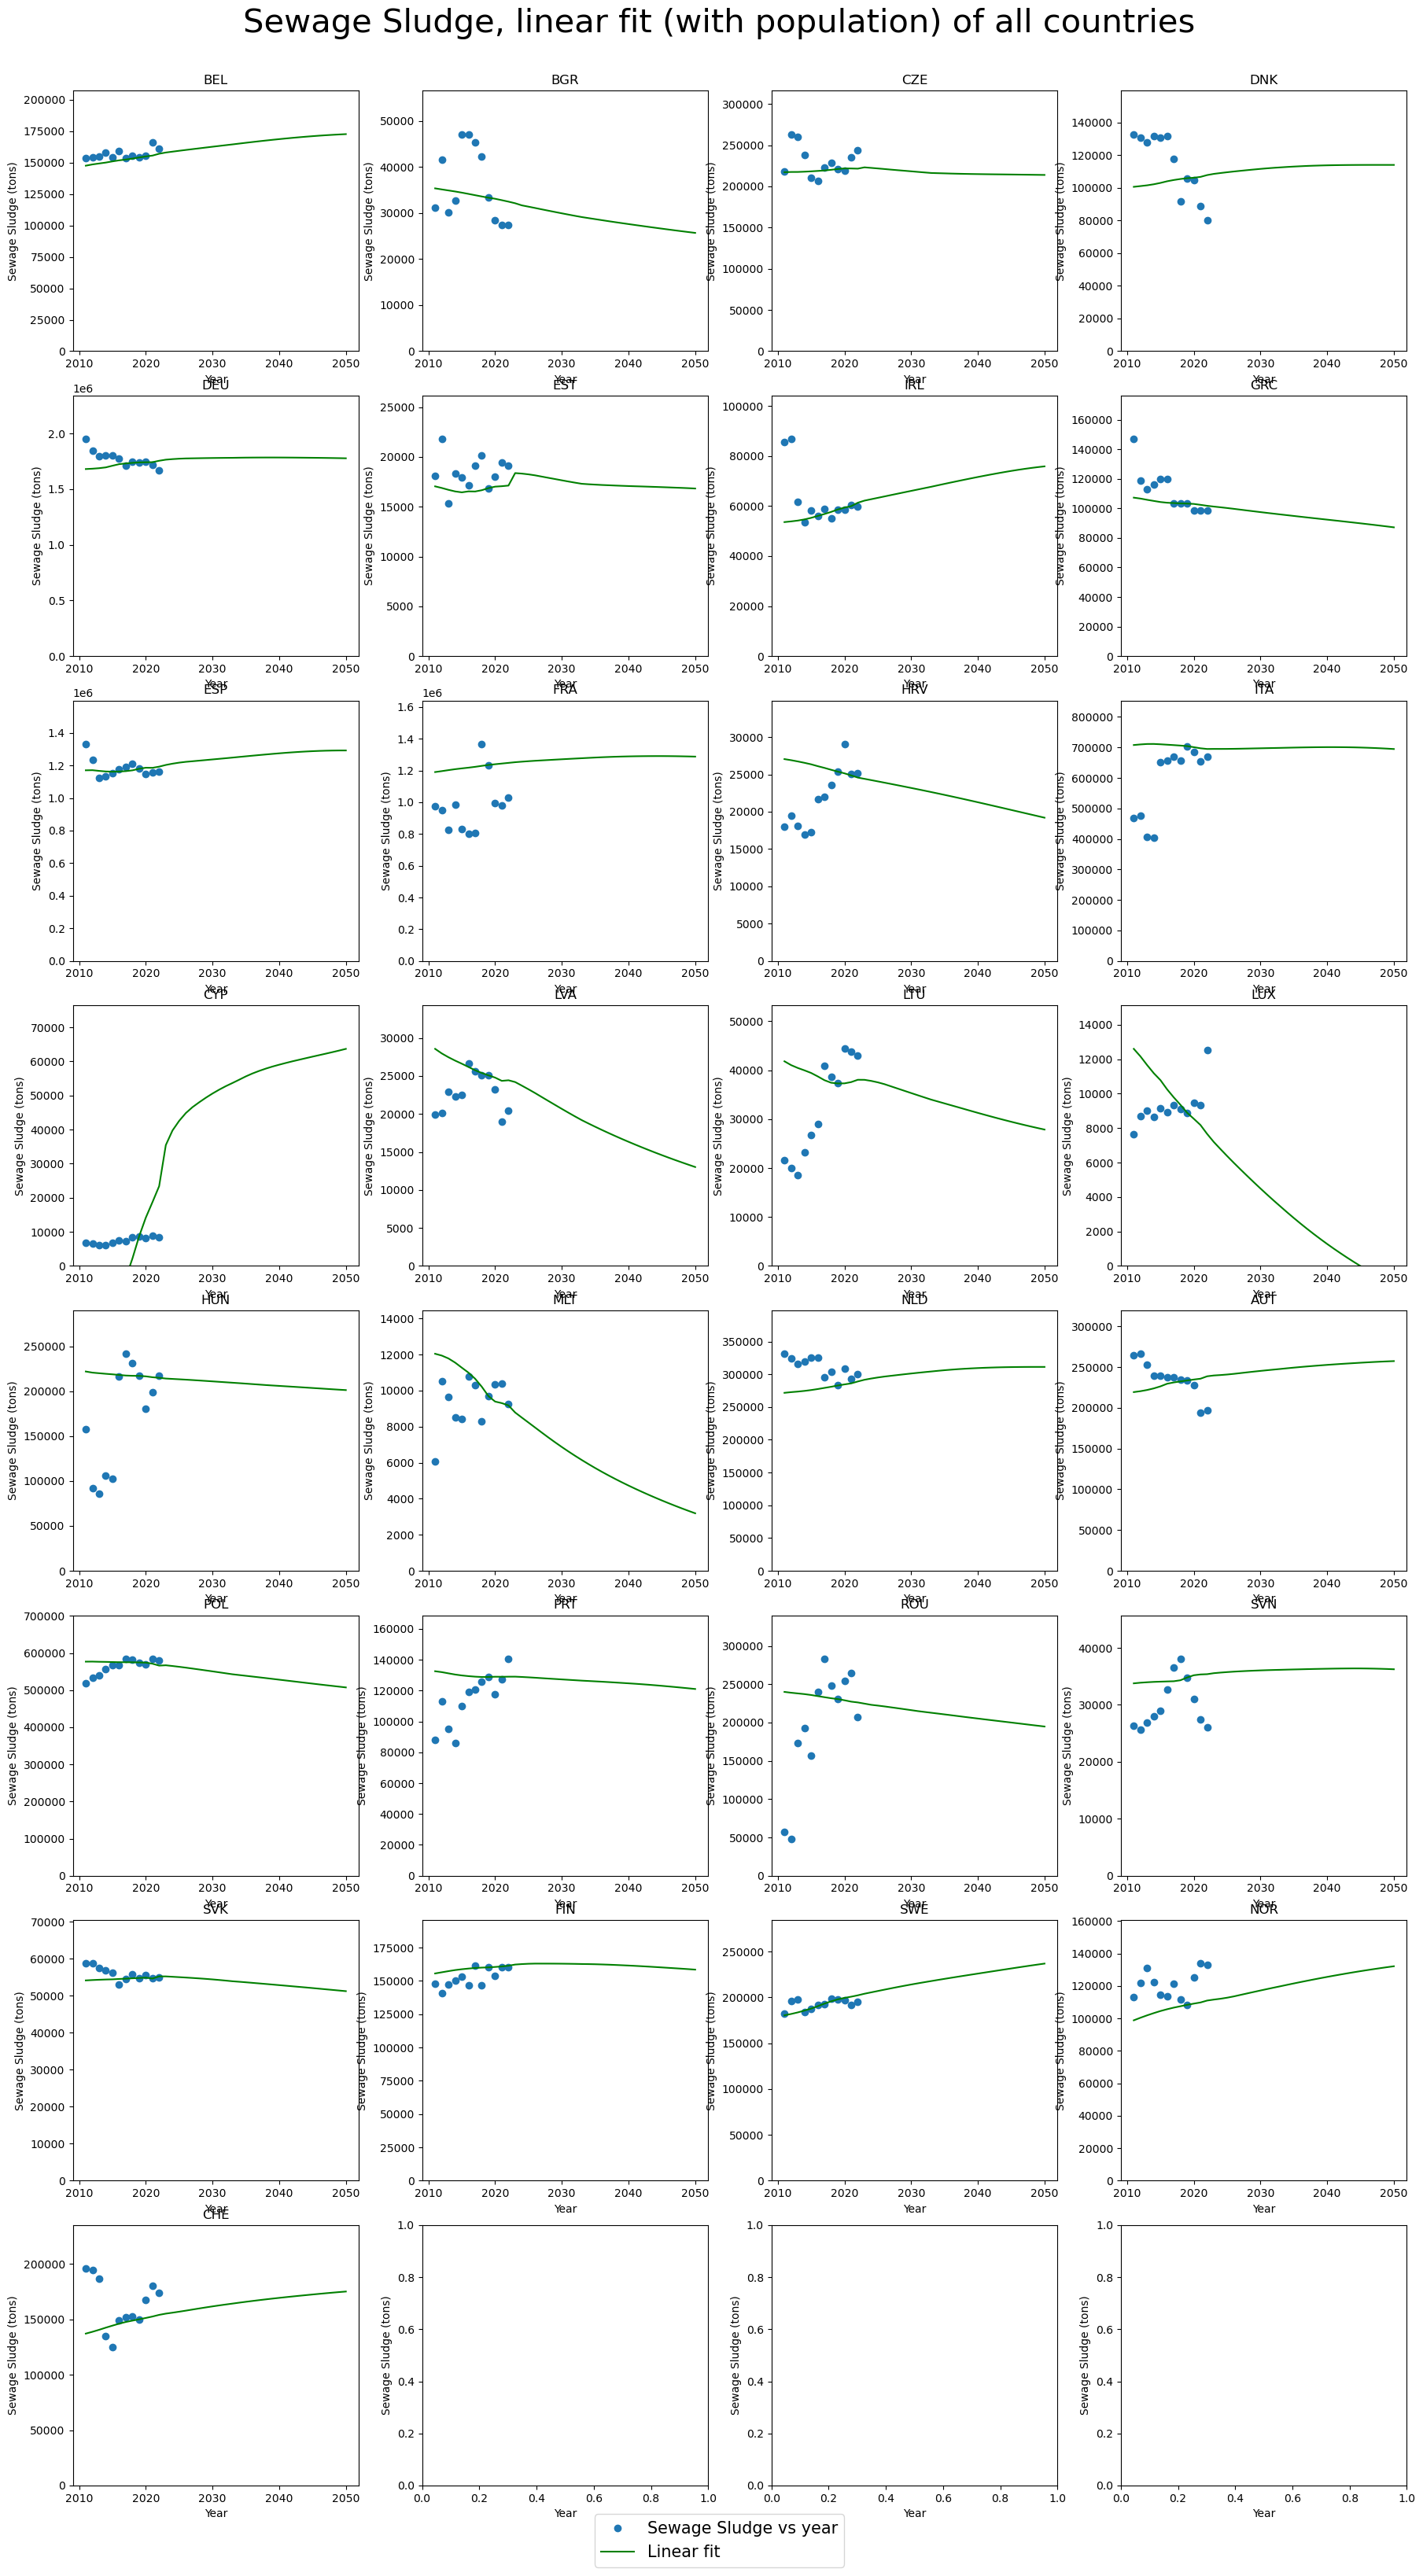

In [211]:
lin_fit = np.polyfit(pd.to_numeric(ss_total['POP']), pd.to_numeric(ss_total['Value']), 1)
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Sewage Sludge vs year', 'Linear fit']
base_year = 2019
i=0
for region in ss_total['LOCATION'].unique():
    reg_data = ss_total.loc[ss_total['LOCATION']==region]
    reg_pop_data = pop.loc[pop['LOCATION']==region]
    lines = axs[i].plot(reg_data['Year'],pd.to_numeric(reg_data['Value']),'o', label='Sewage sludge vs year', color = '#1f77b4')
    legend_handles.extend(lines)
    proxy_base = fit_fun(reg_pop_data.loc[reg_pop_data['TIME']==base_year]['POP'], lin_fit, 1).values[0]
    actual_base = pd.to_numeric(reg_data.loc[reg_data['Year']==base_year]['Value']).values[0]
    
    
    years = np.arange(2011,2051)

    pop_data = pd.to_numeric(reg_pop_data.loc[reg_pop_data['TIME'].isin(years)]['POP'])
    
    lines = axs[i].plot(years,fit_fun(pop_data, lin_fit, 1)/proxy_base*actual_base,'-', label='Linear fit', color = 'green')
    legend_handles.extend(lines)

    #Setting limits of y axis
    y_min = 0
    y_max = max((fit_fun(pop_data, lin_fit, 1)/proxy_base*actual_base).max(), reg_data['Value'].max())
    padding = (y_max - y_min) * 0.2  
    axs[i].set_ylim(y_min, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Year')
    ax.set_ylabel('Sewage Sludge (tons)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge, linear fit (with population) of all countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

## Linear fit SS vs Pop (individual countries)

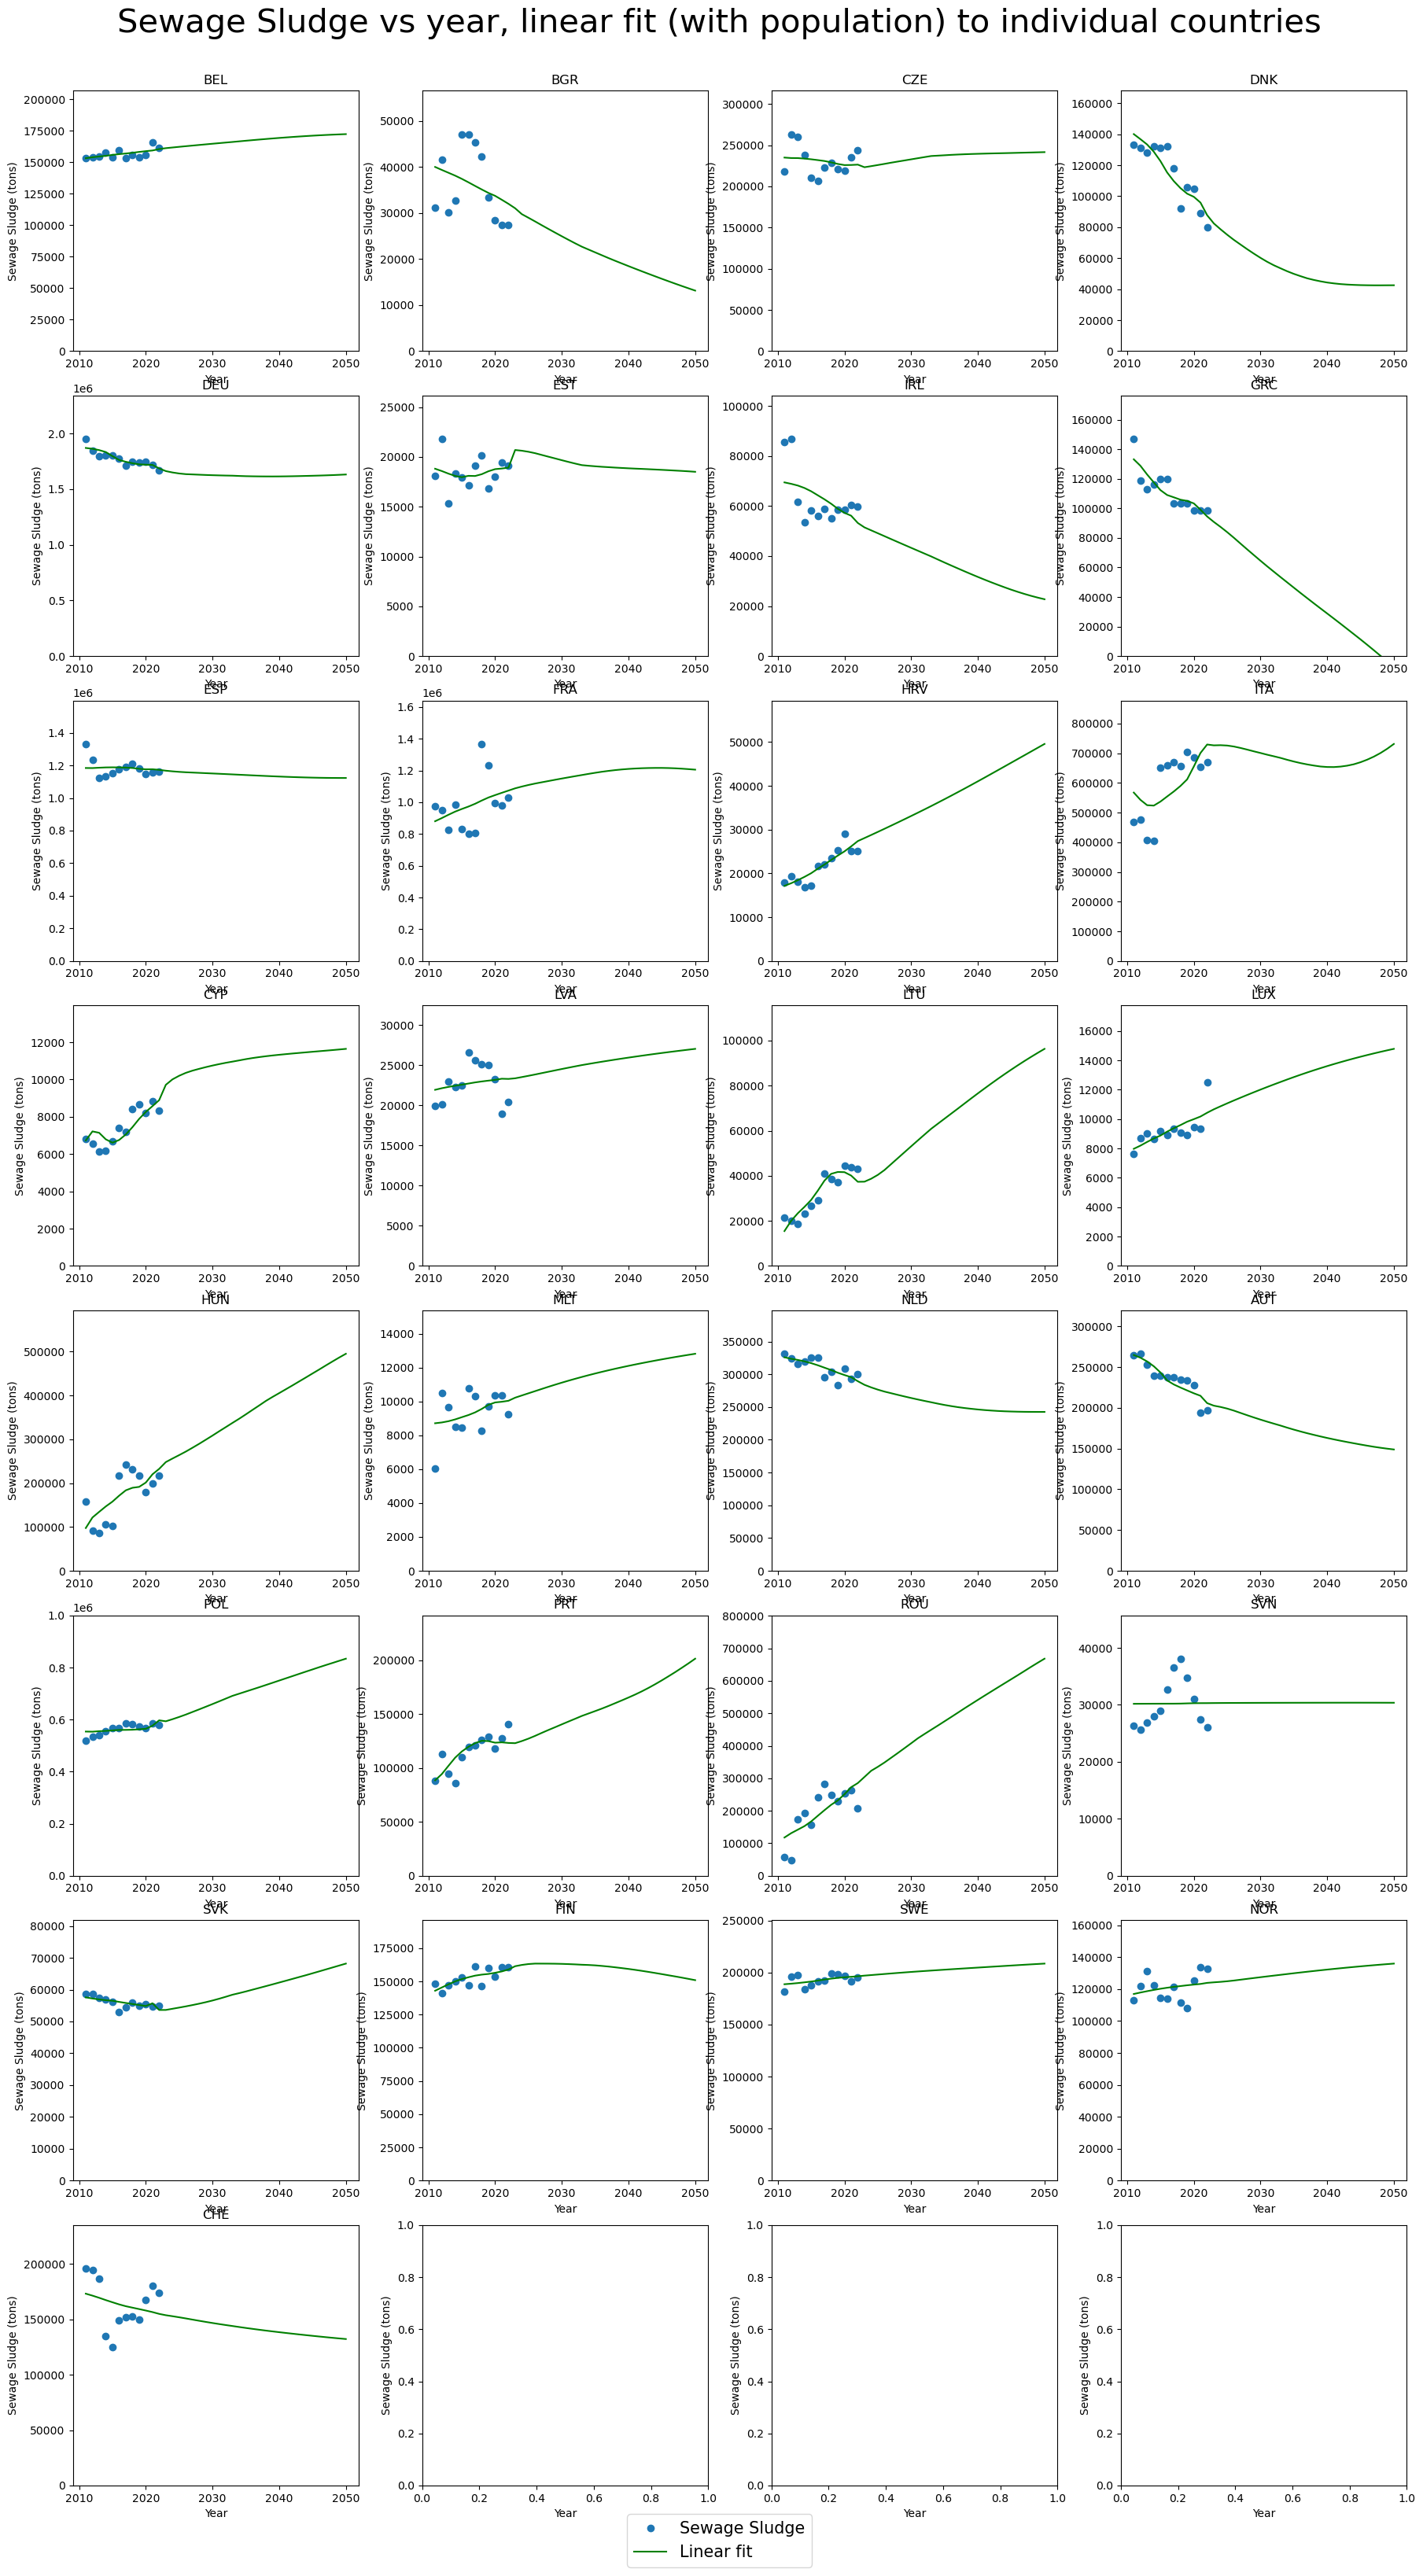

In [216]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Sewage Sludge', 'Linear fit']

i=0
for region in ss_total['LOCATION'].unique():
    reg_data = ss_total.loc[ss_total['LOCATION']==region]
    reg_pop_data = pop.loc[pop['LOCATION']==region]
    lines = axs[i].plot(reg_data['Year'],pd.to_numeric(reg_data['Value']),'o', label='Sewage sludge', color = '#1f77b4')
    legend_handles.extend(lines)
    linear_fit = np.polyfit(pd.to_numeric(reg_data['POP']), pd.to_numeric(reg_data['Value']), 1)

   

    years = np.arange(2011,2051)
    
    #lines = axs[i].plot(years,reg_pop_data.loc[reg_pop_data['TIME'].isin(years)]['POP']/100,'o', label='Population', color = 'orange')
    #legend_handles.extend(lines)
    

    lines = axs[i].plot(years,fit_fun(pd.to_numeric(reg_pop_data.loc[reg_pop_data['TIME'].isin(years)]['POP']), linear_fit, 1),'-', label='Linear fit', color = 'green')
    legend_handles.extend(lines)

    #lines = axs[i].plot(pd.to_numeric(reg_data['POP']),fit_fun(np.log(pd.to_numeric(reg_data['POP'])), log_fit, 1),'-', label='Log fit', color = 'orange')
    #legend_handles.extend(lines)
   
    #Setting limits of y axis
    y_min = 0
    y_max = max(fit_fun(pd.to_numeric(reg_pop_data.loc[reg_pop_data['TIME'].isin(years)]['POP']), linear_fit,1).max(), reg_data['Value'].max())
    padding = (y_max - y_min) * 0.2  
    axs[i].set_ylim(y_min, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Year')
    ax.set_ylabel('Sewage Sludge (tons)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge vs year, linear fit (with population) to individual countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

In [ ]:
#x = pd.merge(pop,gdp_cap,how = 'left',on=['LOCATION', 'TIME'])

In [76]:
#fig = plt.plot(x['POP'],x['GDPVD_CAP'],'o',label='GDP/cap vs POP', color='#7DE2D1')
#plt.plot(x,fit_fun(np.log(x),log_fit,1),'--',label='Log fit', color='#9F9AA4')
#plt.plot(x,fit_fun(np.log(x),log_fit_2,2),'--',label='Log fit, deg 2', color='#B5C9C3')
#plt.plot(ss_total['POP'],ss_total['Value'],'o', label='Sewage Sludge', color = '#575D90')
#plt.xlabel('Population')
#plt.ylabel('GDP/cap')
#plt.legend(loc="lower right", bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 7})
#plt.title('GDP/cap versus population')
#plt.show()

## Function to fit SS/cap vs GDP/cap



In [22]:
def rational_function(x, a, b):
    return b*((a * (x)) / (a + (x)))

#new_fit = np.polyfit(np.power(pd.to_numeric(ss_total['GDPVD_CAP']),-1), np.power(pd.to_numeric(ss_total['SS/cap']),-1), 1)
import scipy.optimize as opt


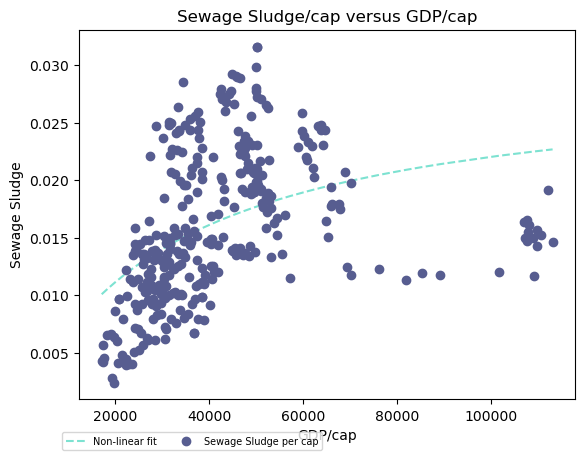

In [23]:
x = pd.to_numeric(ss_total['GDPVD_CAP'])
y= ss_total['SS/cap']
params, covariance = opt.curve_fit(rational_function, x, y, p0=[50000,0.03])  # Initial guess a=1

# Extract fitted parameter
a_fit = params[0]
b_fit=params[1]

x = pd.to_numeric(ss_total['GDPVD_CAP'].sort_values())

fig = plt.plot(x,rational_function(x,a_fit,b_fit),'--',label='Non-linear fit', color='#7DE2D1')
plt.plot(ss_total['GDPVD_CAP'],ss_total['SS/cap'],'o', label='Sewage Sludge per cap', color = '#575D90')
plt.xlabel('GDP/cap')
plt.ylabel('Sewage Sludge')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 7})
plt.title('Sewage Sludge/cap versus GDP/cap')
plt.show()

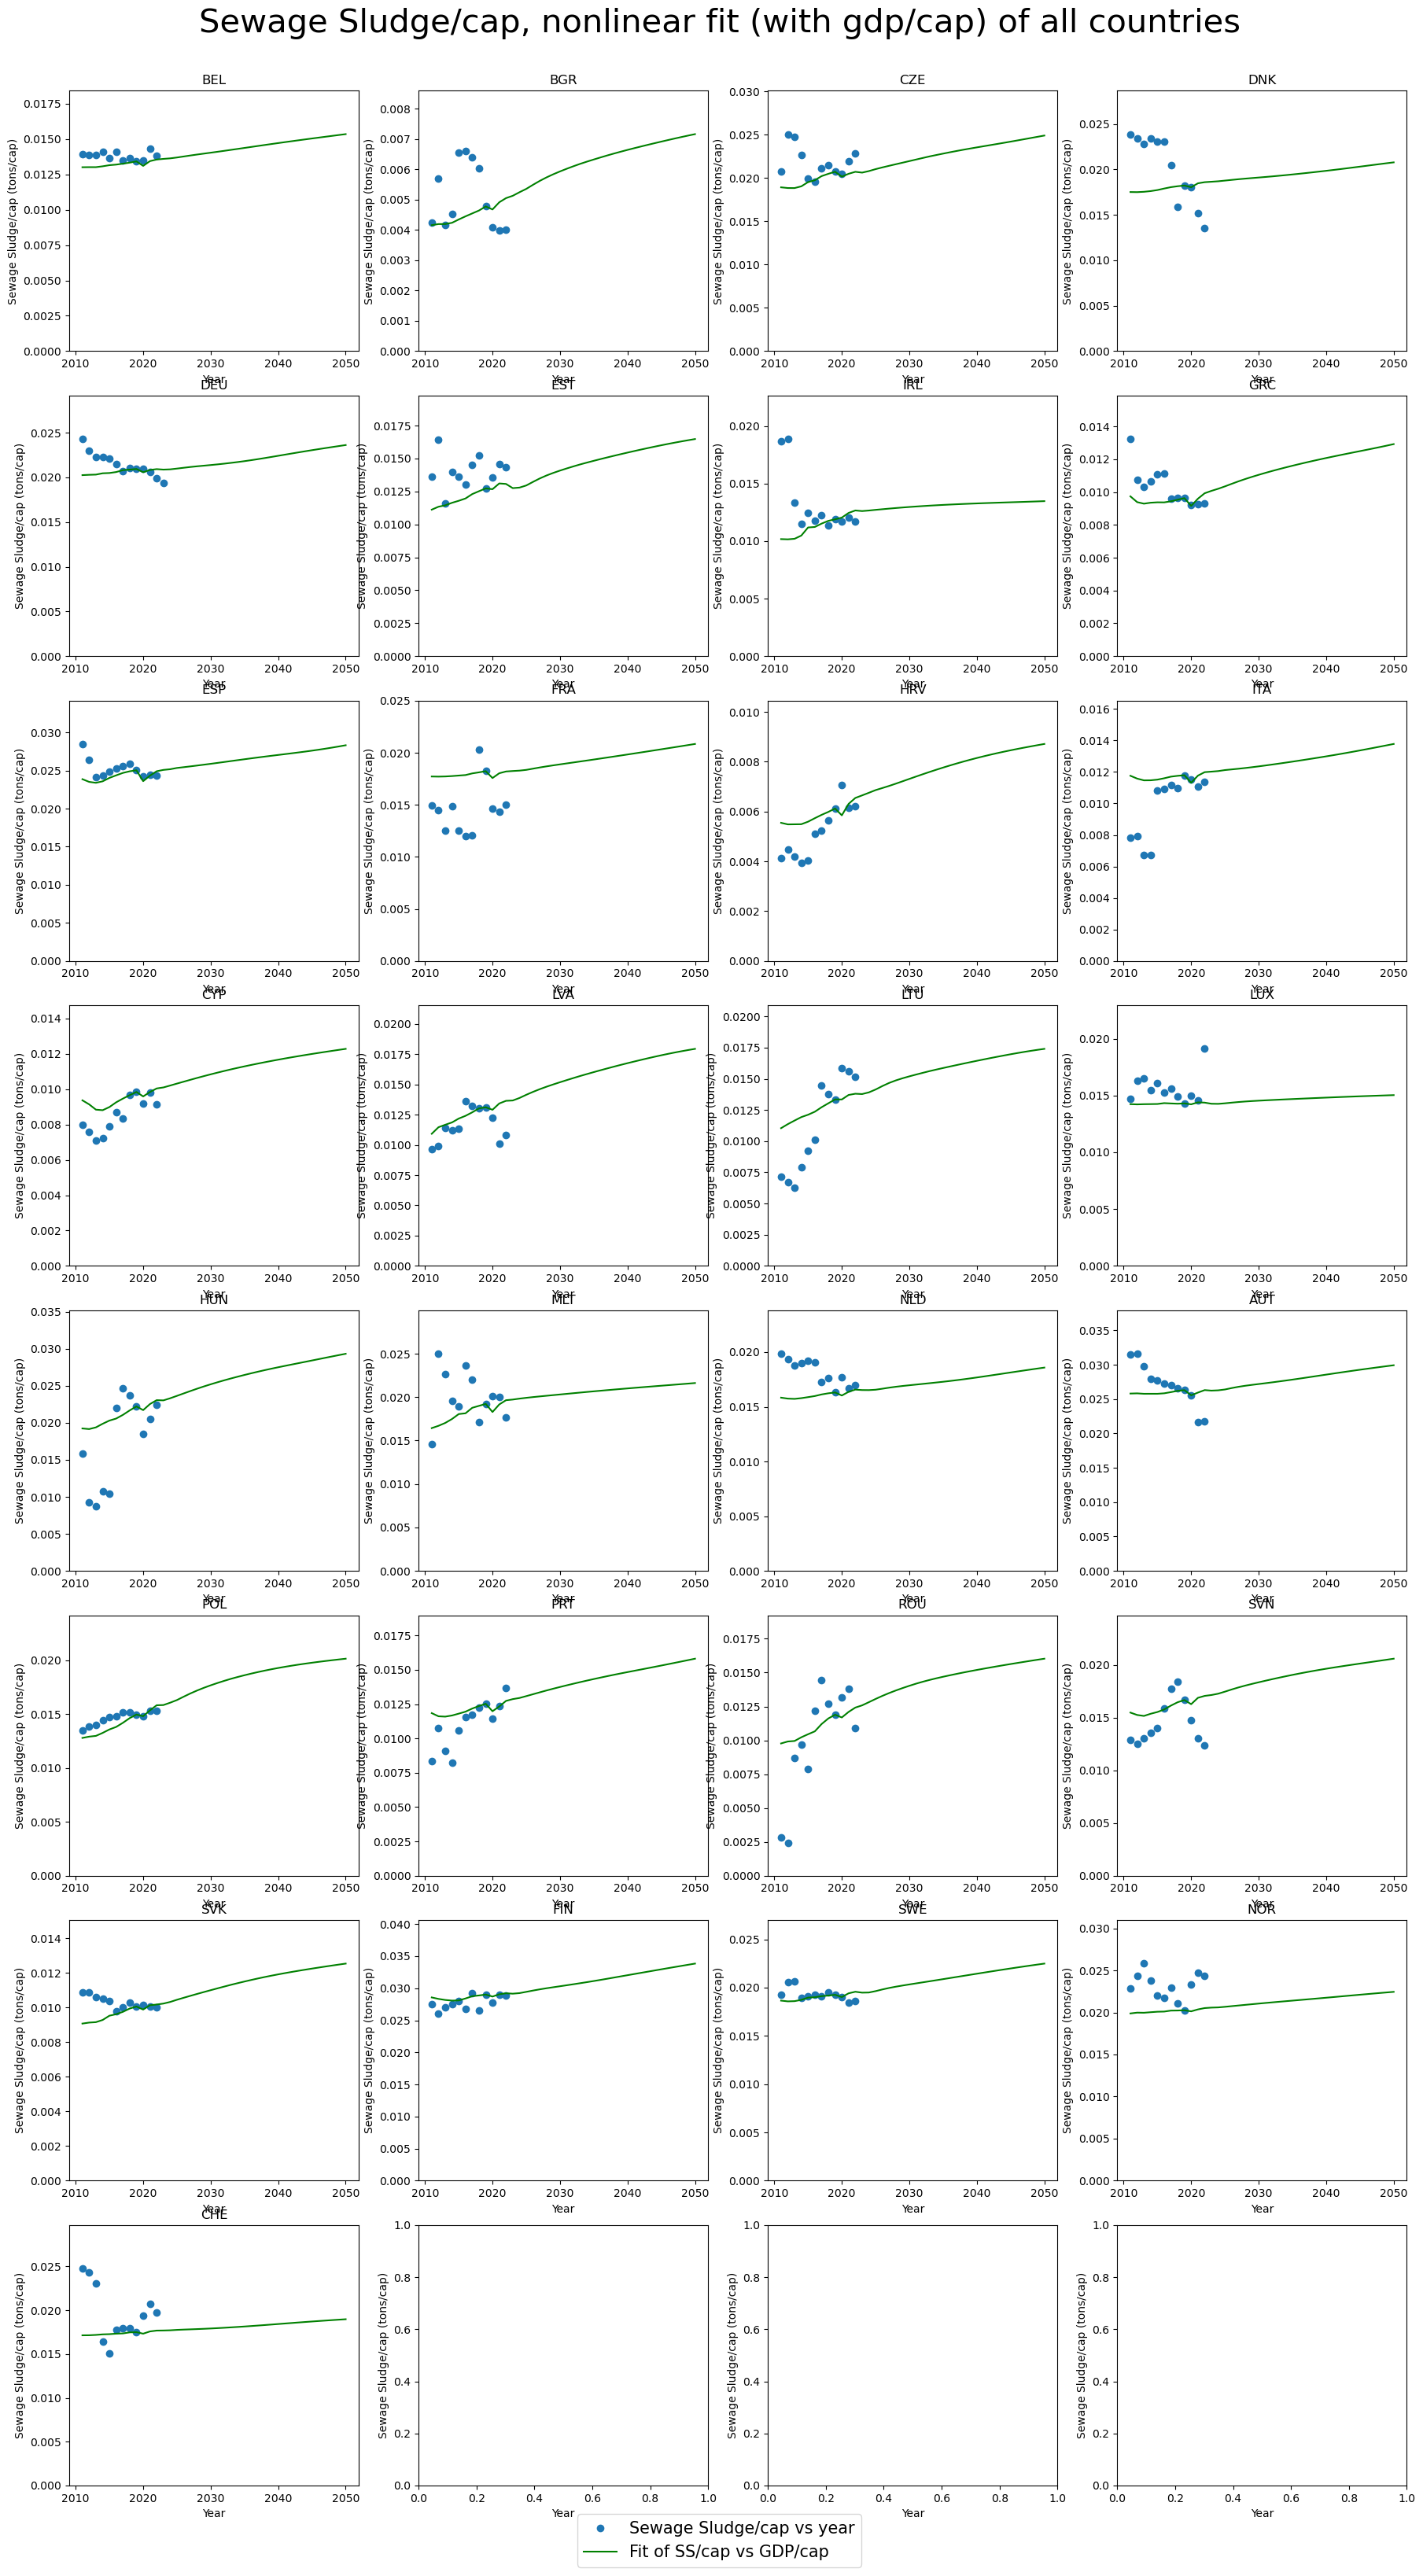

In [30]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Sewage Sludge/cap vs year', 'Fit of SS/cap vs GDP/cap']

i=0
for region in ss_total[ss_total['LOCATION']!='GBR']['LOCATION'].unique():
    if region != 'GBR':
        base_year = 2019
    else:
        base_year = 2022
    reg_data = ss_total.loc[ss_total['LOCATION']==region]
    reg_gdp_data = gdp_cap.loc[gdp_cap['LOCATION']==region]
    lines = axs[i].plot(reg_data['Year'],pd.to_numeric(reg_data['SS/cap']),'o', label='Sewage Sludge/cap vs year', color = '#1f77b4')
    legend_handles.extend(lines)
    
    
    x = pd.to_numeric(ss_total['GDPVD_CAP'])
    y= ss_total['SS/cap']
    params, covariance = opt.curve_fit(rational_function, x, y, p0=[50000,0.03])  # Initial guess a=1

    # Extract fitted parameter
    a_fit = params[0]
    b_fit=params[1]

    proxy_base = rational_function(reg_gdp_data.loc[reg_gdp_data['TIME']==base_year]['GDPVD_CAP'], a_fit,b_fit).values[0]
    actual_base = pd.to_numeric(reg_data.loc[reg_data['Year']==base_year]['SS/cap']).values[0]
    
    years = np.arange(2011,2051)

    gdp_data = pd.to_numeric(reg_gdp_data.loc[reg_gdp_data['TIME'].isin(years)]['GDPVD_CAP'])
    
    lines = axs[i].plot(years,rational_function(gdp_data, a_fit,b_fit)/proxy_base*actual_base,'-', label='Fit of SS/cap vs GDP/cap', color = 'green')
    legend_handles.extend(lines)

    #Setting limits of y axis
    y_min = 0
    y_max = max((rational_function(gdp_data, a_fit,b_fit)/proxy_base*actual_base).max(), reg_data['SS/cap'].max())
    padding = (y_max - y_min) * 0.2  
    axs[i].set_ylim(y_min, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Year')
    ax.set_ylabel('Sewage Sludge/cap (tons/cap)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge/cap, nonlinear fit (with gdp/cap) of all countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

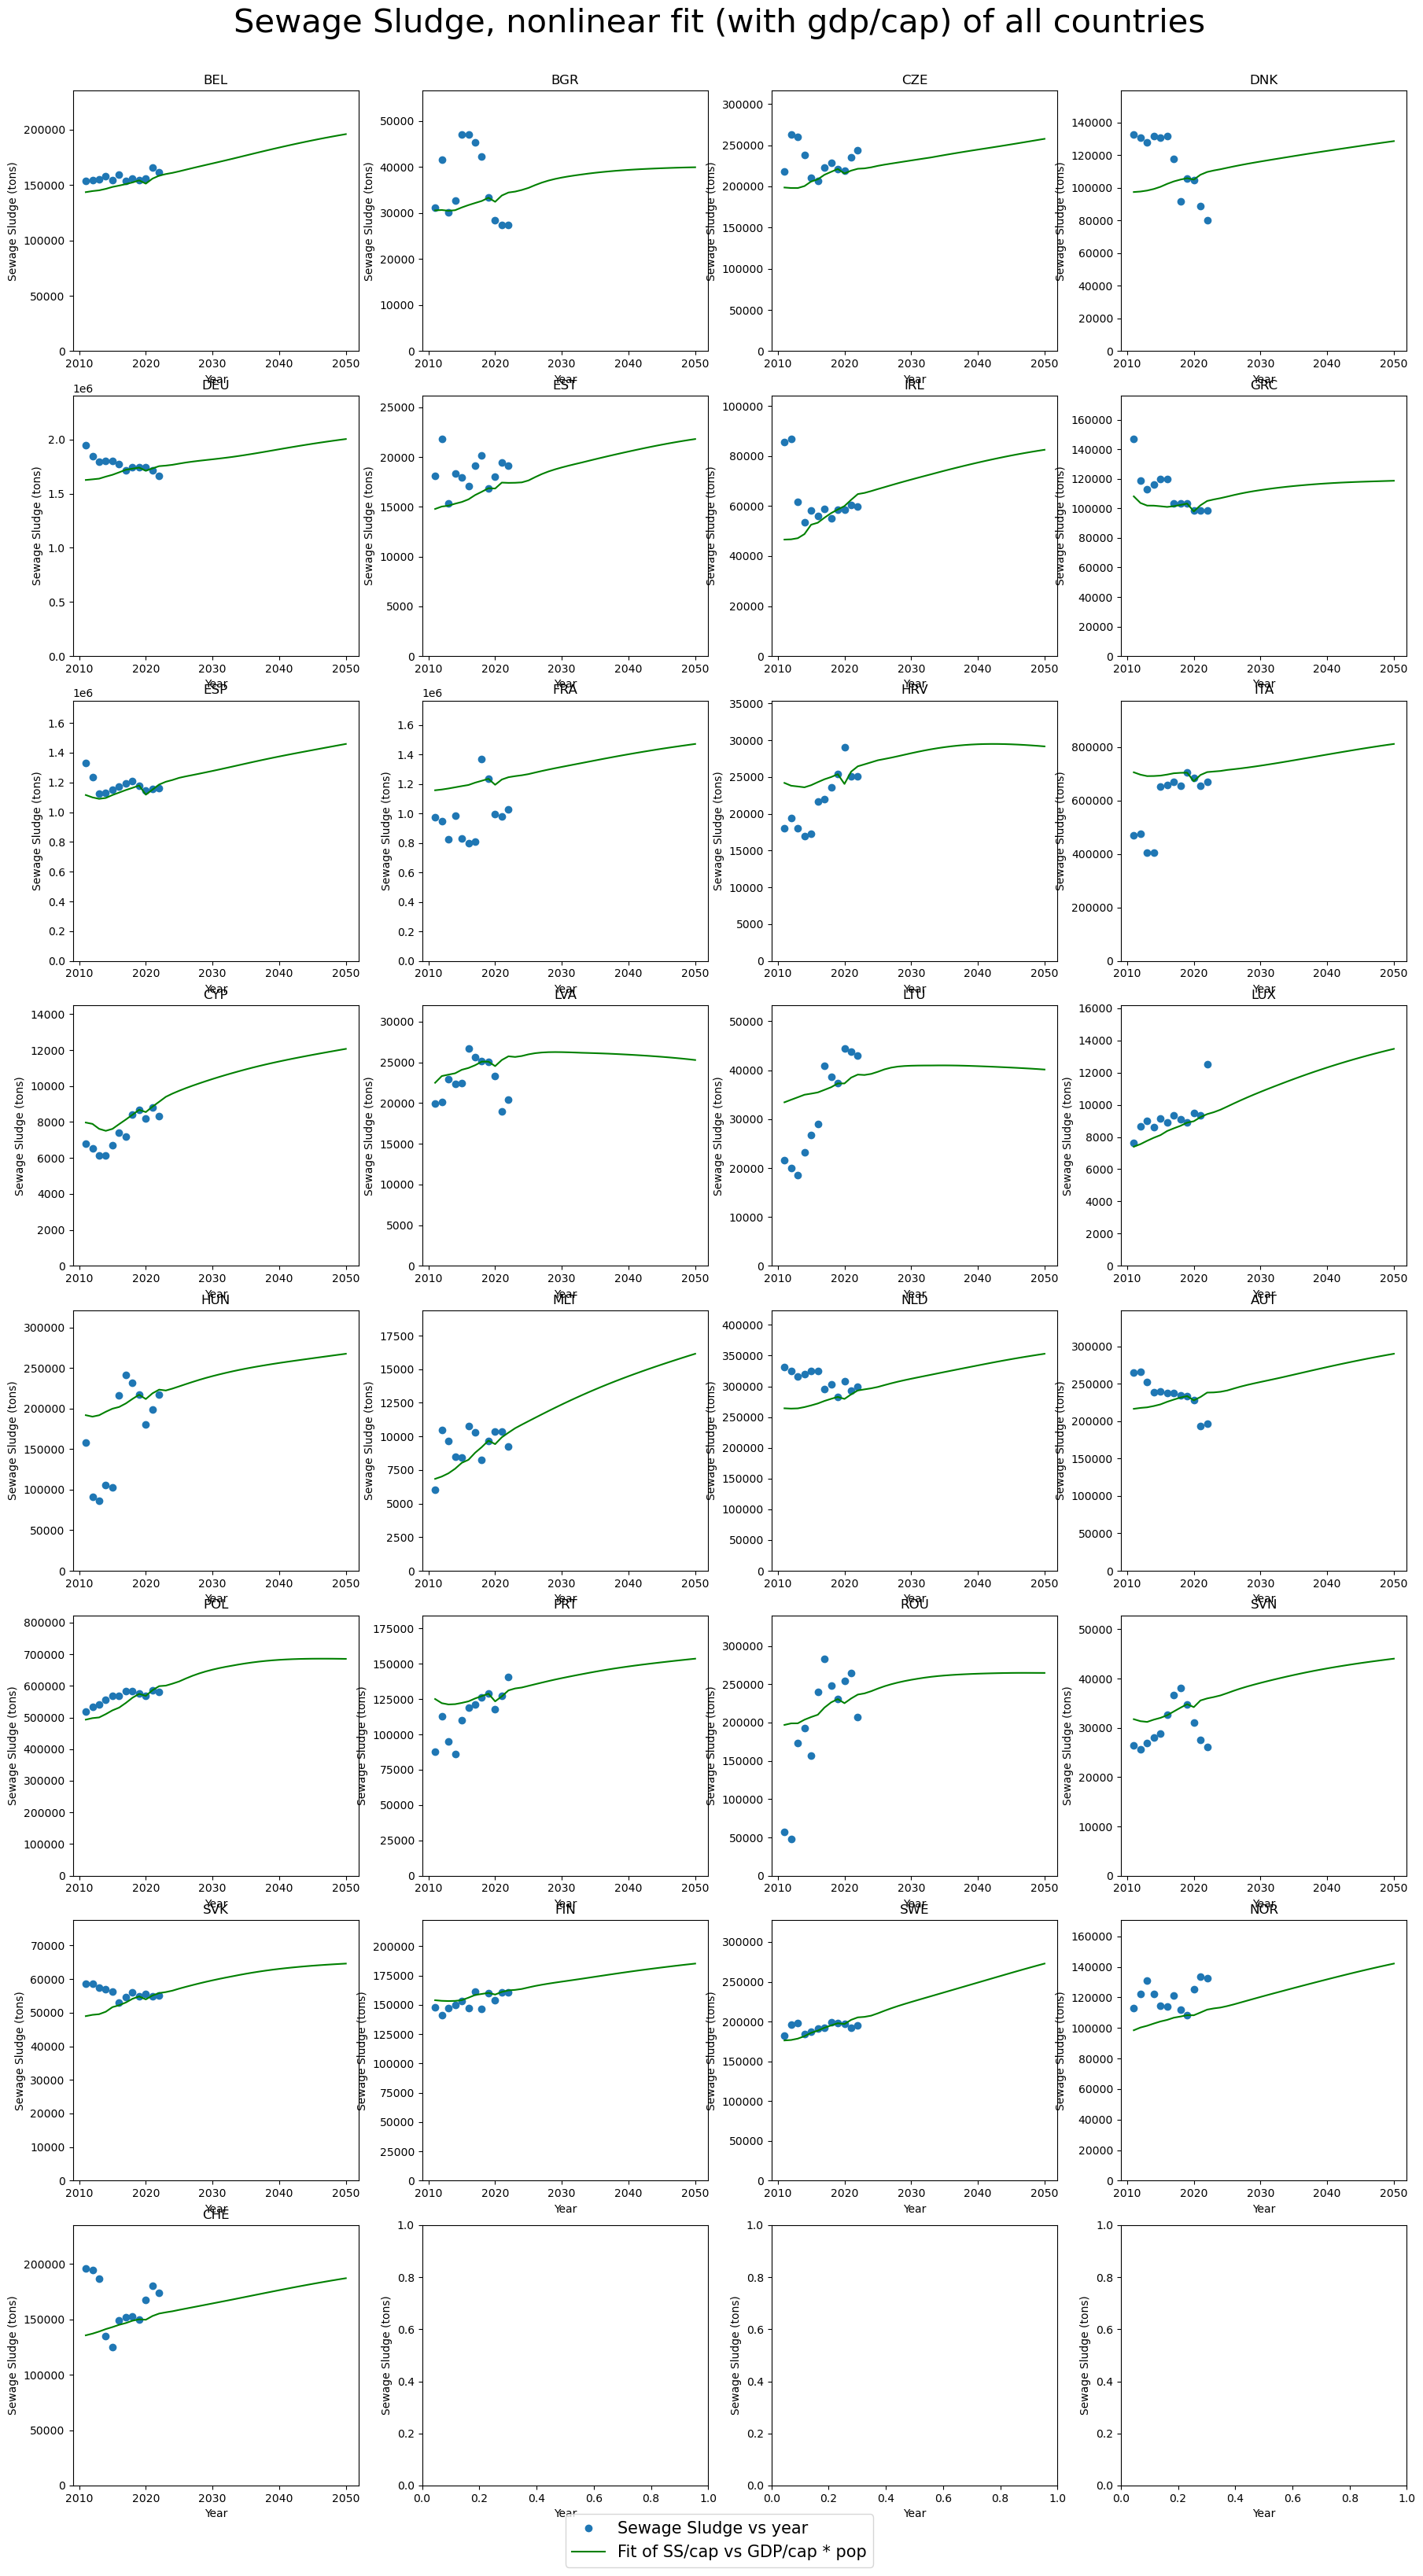

In [48]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Sewage Sludge vs year', 'Fit of SS/cap vs GDP/cap * pop']
base_year = 2019
i=0
for region in ss_total[ss_total['LOCATION']!='GBR']['LOCATION'].unique():
    reg_data = ss_total.loc[ss_total['LOCATION']==region]
    reg_pop_data = pop.loc[pop['LOCATION']==region]
    reg_gdp_data = gdp_cap.loc[gdp_cap['LOCATION']==region]
    
    lines = axs[i].plot(reg_data['Year'],pd.to_numeric(reg_data['Value']),'o', label='Sewage Sludge vs year', color = '#1f77b4')
    legend_handles.extend(lines)
    
    
    x = pd.to_numeric(ss_total['GDPVD_CAP'])
    y= ss_total['SS/cap']
    params, covariance = opt.curve_fit(rational_function, x, y, p0=[50000,0.03])  # Initial guess a=1

    # Extract fitted parameter
    a_fit = params[0]
    b_fit=params[1]

    proxy_base = rational_function(reg_gdp_data.loc[reg_gdp_data['TIME']==base_year]['GDPVD_CAP'], a_fit,b_fit).values[0]
    actual_base = pd.to_numeric(reg_data.loc[reg_data['Year']==base_year]['SS/cap']).values[0]
    
    years = np.arange(2011,2051)

    gdp_data = pd.to_numeric(reg_gdp_data.loc[reg_gdp_data['TIME'].isin(years)]['GDPVD_CAP'])
    pop_data = pd.to_numeric(reg_pop_data.loc[reg_pop_data['TIME'].isin(years)]['POP'])
    pop_data.reset_index(drop=True, inplace=True)
    gdp_data.reset_index(drop=True, inplace=True)
    lines = axs[i].plot(years,rational_function(gdp_data, a_fit,b_fit)/proxy_base*actual_base*pop_data,'-', label='Fit of SS/cap vs GDP/cap * pop', color = 'green')
    legend_handles.extend(lines)

    #Setting limits of y axis
    y_min = 0
    y_max = max((rational_function(gdp_data, a_fit,b_fit)/proxy_base*actual_base*pop_data).max(), reg_data['Value'].max())
    padding = (y_max - y_min) * 0.2  
    axs[i].set_ylim(y_min, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Year')
    ax.set_ylabel('Sewage Sludge (tons)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge, nonlinear fit (with gdp/cap) of all countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

# Thermal Treatment projections

In [23]:
treatment_methods = ss_treatment['Treatment'].unique()
ss_treatment = ss_treatment.pivot(index = ['LOCATION','Year','Unit','POP','GDPVD_CAP'],columns='Treatment', values= 'Value').reset_index()
ss_treatment=ss_treatment.rename_axis(None, axis=1)
ss_treatment[treatment_methods]=ss_treatment[treatment_methods].replace(':',0)
ss_treatment[[method + '%' for method in treatment_methods]]=ss_treatment[treatment_methods].div(ss_treatment['Total'], axis=0)

In [24]:
ss_treatment=ss_treatment[ss_treatment['Year']!=2023]

In [25]:
ss_treatment = ss_treatment[ss_treatment['LOCATION']!='GBR']

## Plots

### Treatment trends

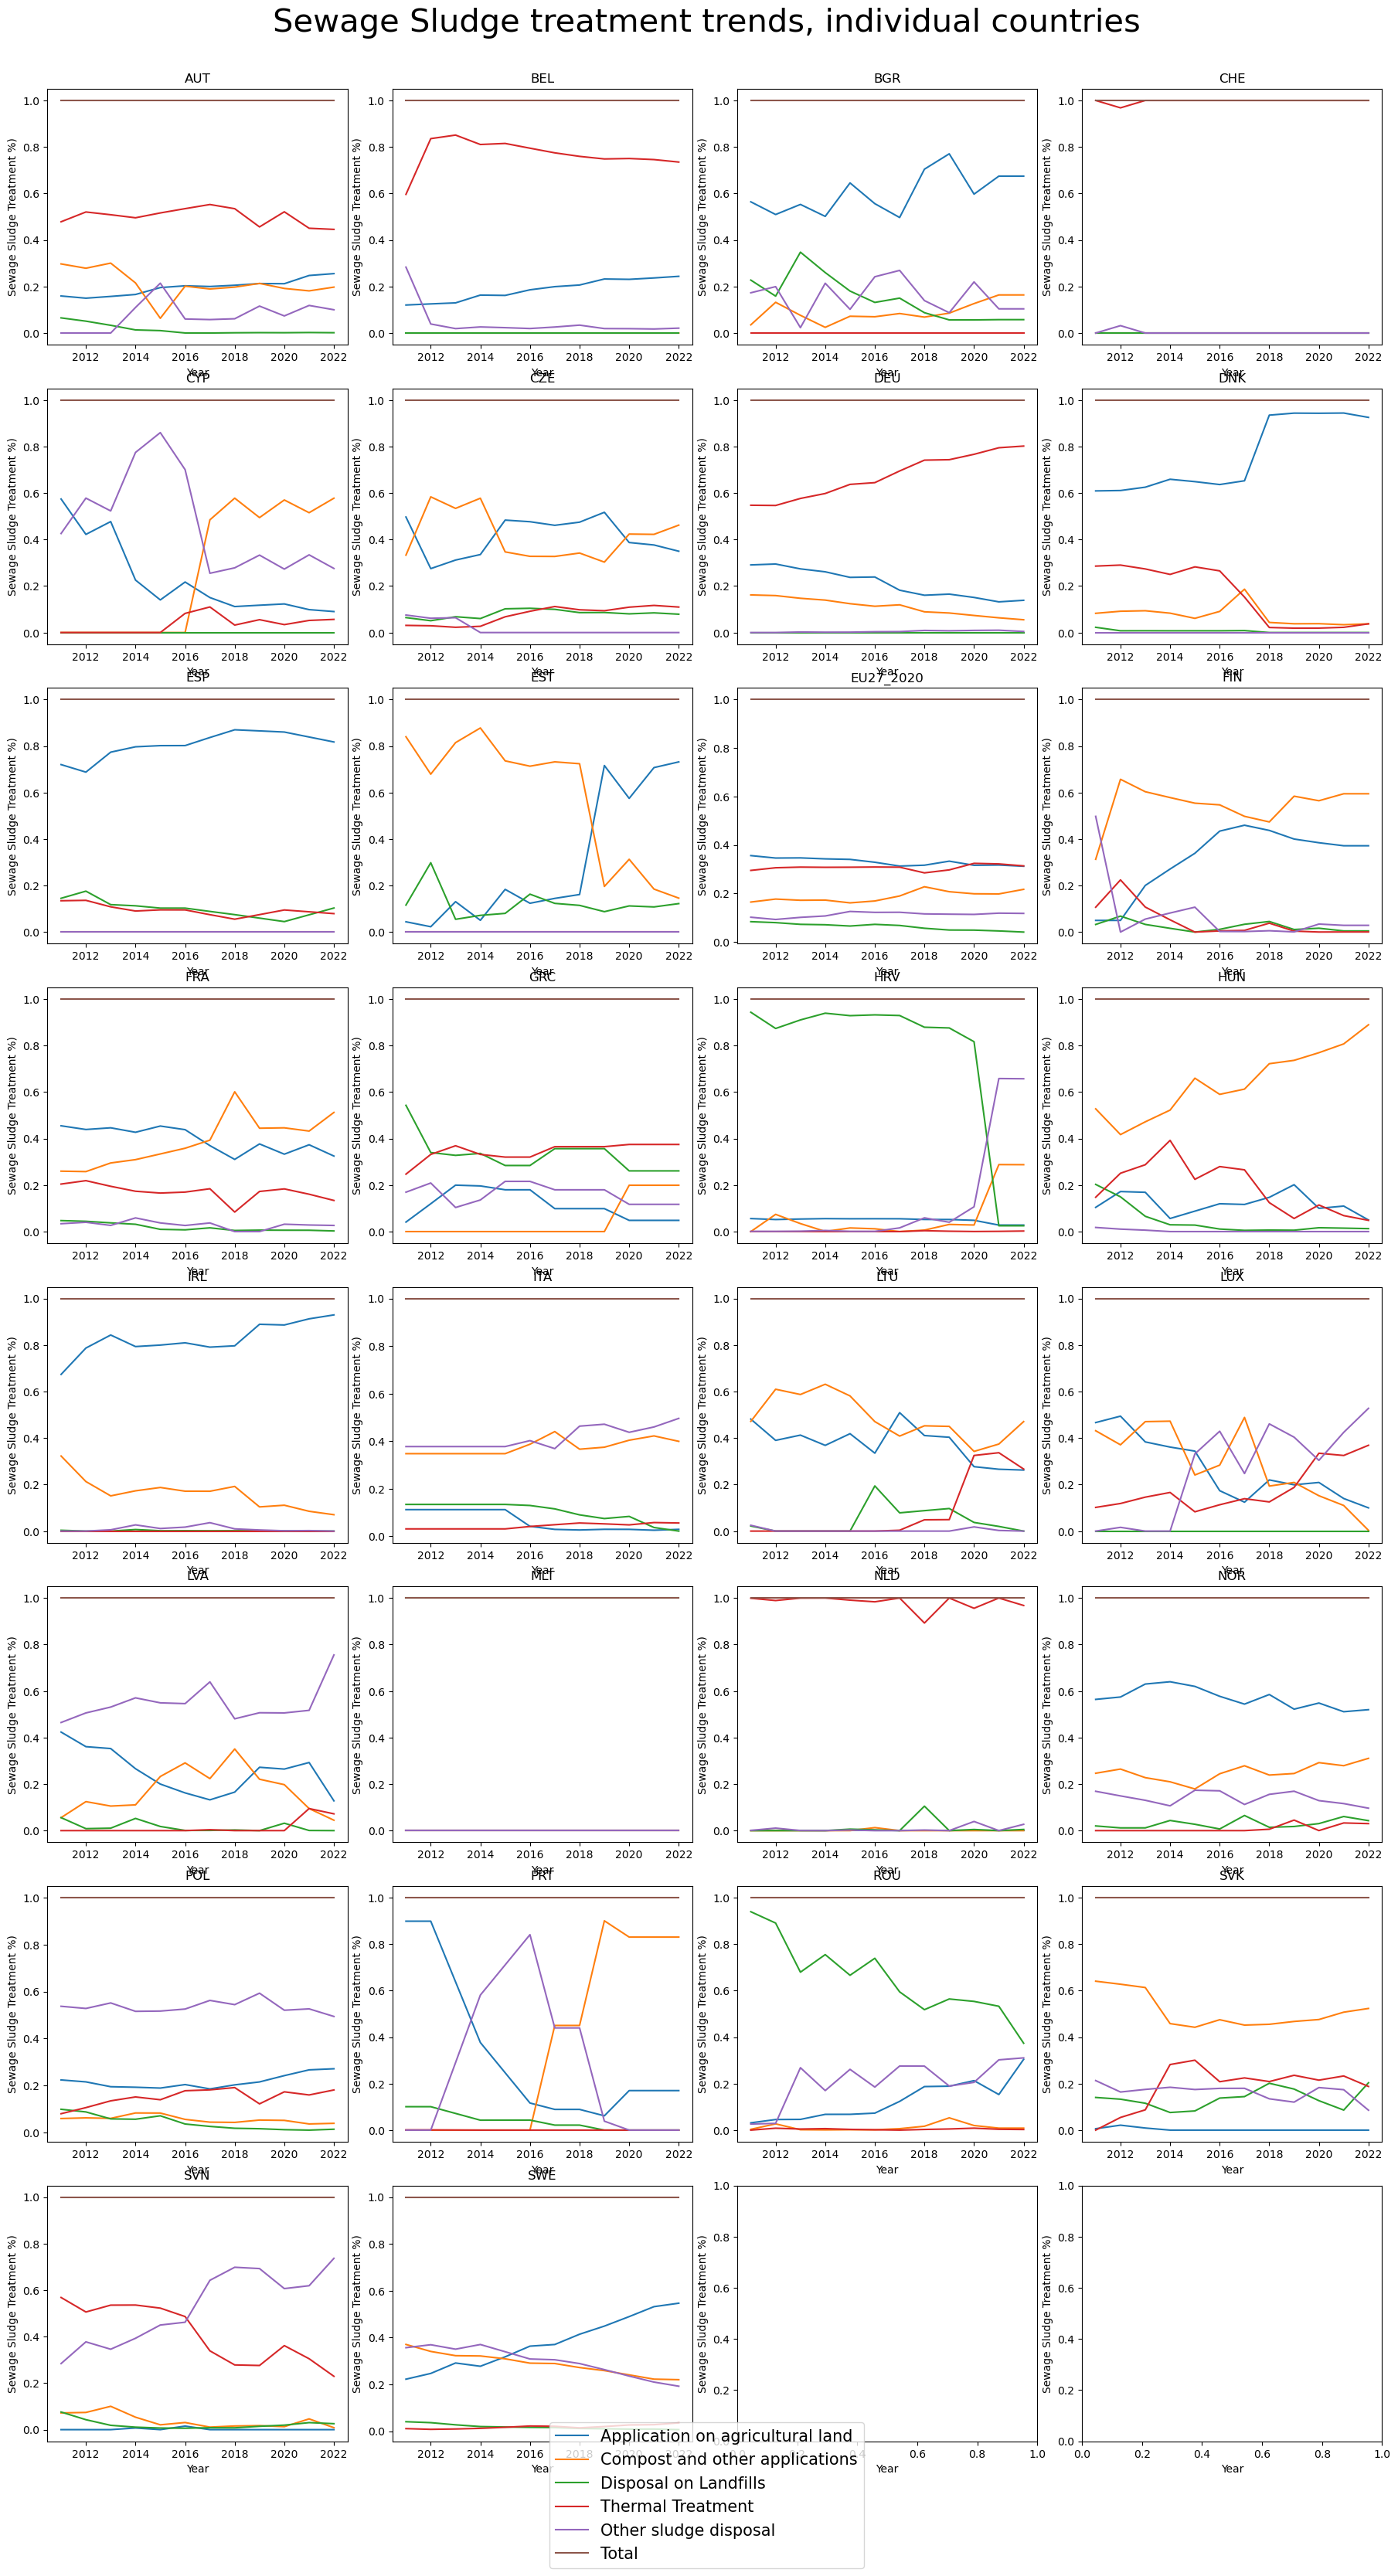

In [55]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = treatment_methods

i=0
for region in ss_treatment['LOCATION'].unique():
    reg_data = ss_treatment.loc[ss_treatment['LOCATION']==region]
    for method in treatment_methods:
        lines = axs[i].plot(reg_data['Year'],reg_data[method+'%'],'-', label=method)
        legend_handles.extend(lines)
    
    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Year')
    ax.set_ylabel('Sewage Sludge Treatment %)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge treatment trends, individual countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

### Projections Treatment trends

In [26]:
from scipy.optimize import minimize, curve_fit, show_options
from functools import partial

In [27]:
# Logistic Function
def logistic_fun(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

In [28]:
# Objective function that needs to be minimised
def objective(params, years, obs):
    calculated = logistic_fun(years, params[0],params[1],params[2])
    difference = np.sum((calculated - obs)**2)
    return difference

In [29]:
# Function for calculating prediction with the given params, years
def prediction(params, years):
    return logistic_fun(years, params[0], params[1], params[2])

In [30]:
# Constraint for minimization
def con_1(params, years):
    #constraint: prediction>0
    return (logistic_fun(years,params[0], params[1], params[2]))

def con_2(params, years):
    #constraint: prediction<1
    return (1-logistic_fun(years,params[0], params[1], params[2]))

years = np.arange(2010,2051)

cons = [{'type': 'ineq', 'fun': partial(con_1, years=years)},
        {'type': 'ineq', 'fun': partial(con_2, years=years)},
            ]

# Bounds for minimization
bounds = [(-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf)]


/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_61869/2482298398.py:25: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})


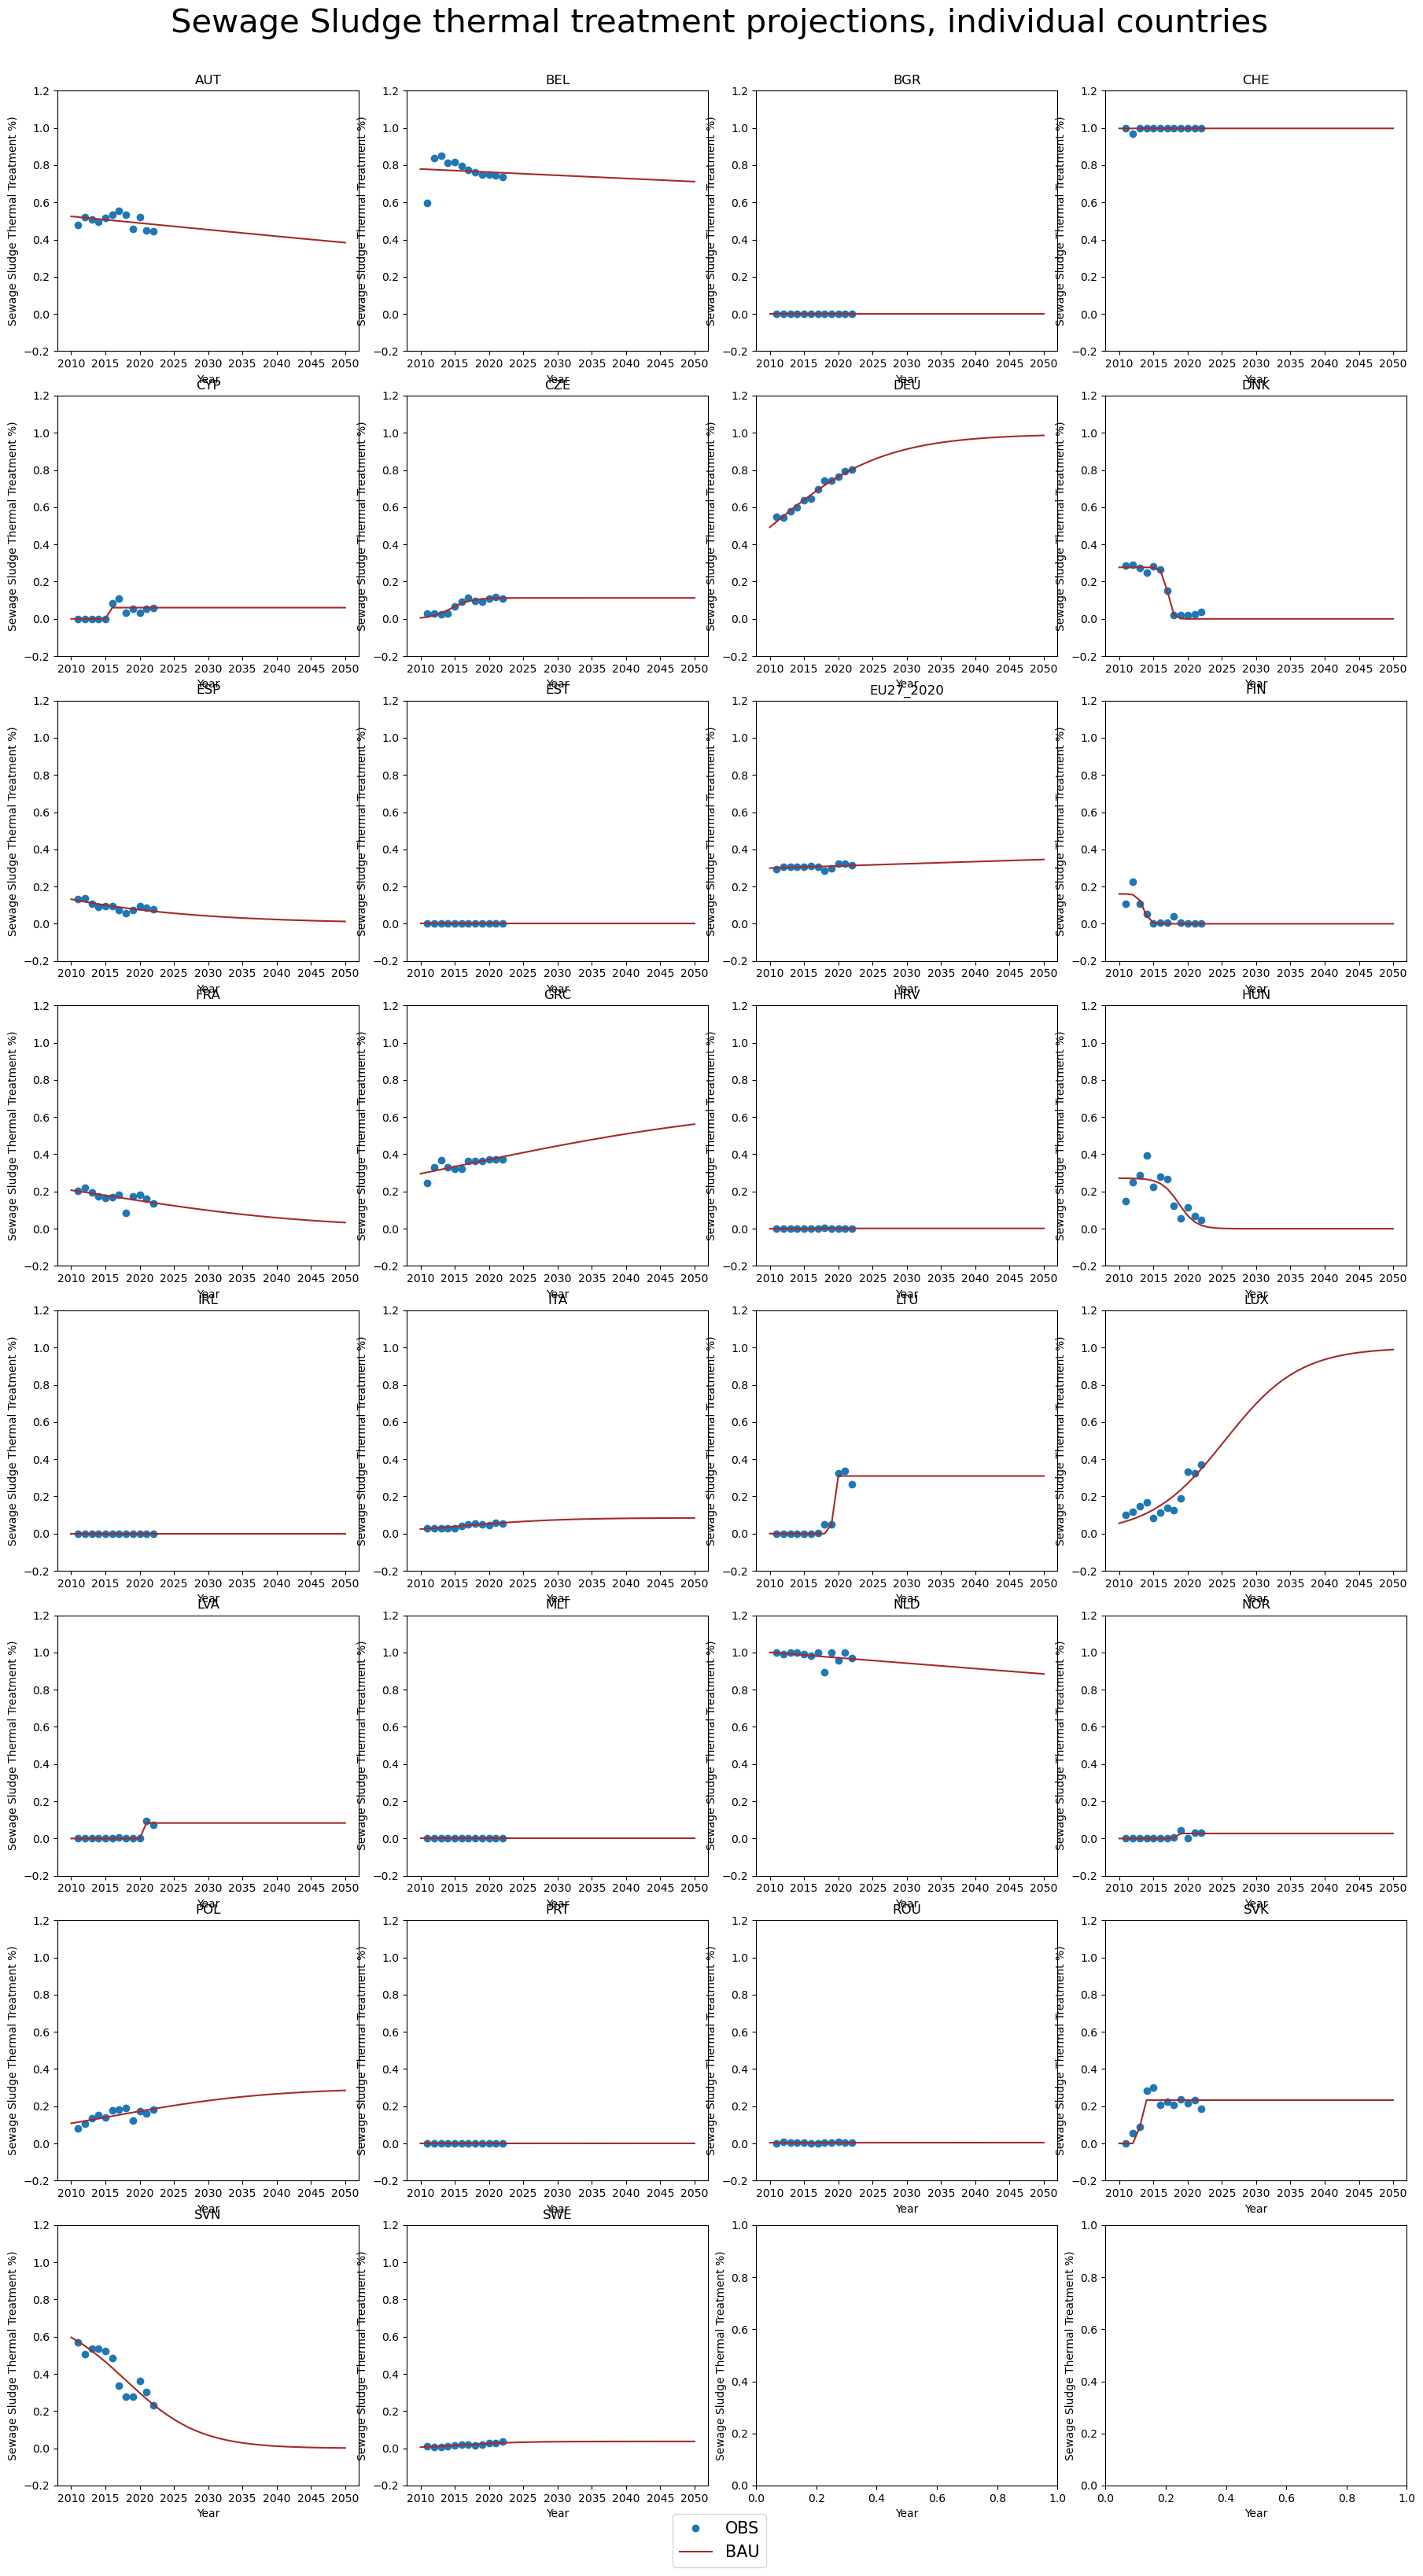

In [32]:
fig, axs = plt.subplots(8, 4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['OBS','BAU']

i=0
for region in ss_treatment['LOCATION'].unique():
    reg_data = ss_treatment.loc[ss_treatment['LOCATION']==region]
    
    lines = axs[i].plot(reg_data['Year'],reg_data['Thermal Treatment%'],'o', label='Thermal Treatment%')
    legend_handles.extend(lines)
    
    years = np.arange(2010,2051)

    #Fit for logistic function
    x0_in = reg_data["Year"].median()

        
    initial_params = [reg_data["Thermal Treatment%"].max(), 0.1, x0_in]
    if (region=='AUT')| (region=='NLD')|(region=='BEL'):
        bounds = [(0, reg_data["Thermal Treatment%"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]
    else:
        bounds = [(0, 1), (-np.inf,np.inf), (-np.inf, np.inf)]

    results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
    params = results.x
        
    lines = axs[i].plot(years,prediction(params, years),'-', label='Logistic fit', color = 'brown')
    legend_handles.extend(lines)
    
    
   
    #Setting limits of y axis
    y_min = 0
    y_max = 1
    padding = (y_max - y_min) * 0.2  
    axs[i].set_ylim(y_min - padding, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Year')
    ax.set_ylabel('Sewage Sludge Thermal Treatment %)')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

# Add title for the entire figure
title = fig.suptitle('Sewage Sludge thermal treatment projections, individual countries', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

# Converting to Ash

In [ ]:
# Waste codes for Wood
ss_ba_code = '19 01 12'
ss_fa_code = '19 01 14'
#ba/fa ratios
#ratio of BA to FA is 
#ba_ratio = 0.045*(0.95)+0.955*(0.05)
#fa_ratio = 0.045*(0.05)+0.955*(0.95)
tech_share = pd.read_excel('sewage_sludge/tech_share.xlsx')

ss_con_f = 0.4 #total ssa content

In [32]:
bau_data = pd.DataFrame(columns = ['Waste Stream', 'Location', 'Year', 'Scenario', 'Substance_main_parent',
       'additionalSpecification', 'Stock/Flow ID', 'Value', 'Unit',
       'Data Quality', 'Reference', 'Remark 1 (Method)', 'Remarks 2',
       'Remark 3 - who put in the data', 'Remark 4'])

In [33]:
base_year = 2019

for ash_code in np.arange(1,3):
    if ash_code==1:
        code=ss_ba_code
    elif ash_code==2:
        code=ss_fa_code


    i=0
    for region in ss_total[ss_total['LOCATION']!='GBR']['LOCATION'].unique():
        if ash_code==1:
            ratio = tech_share.loc[tech_share['Country']==region]['Bottom Ash'].values[0]
        elif ash_code==2:
            ratio = tech_share.loc[tech_share['Country']==region]['Fly ash'].values[0]
        
        con_f = ratio * ss_con_f
        
        reg_data = ss_total.loc[ss_total['LOCATION']==region]
        reg_gdp_data = gdp_cap.loc[gdp_cap['LOCATION']==region]
        reg_pop_data = pop.loc[pop['LOCATION']==region]
        # Projectiosn for SS total
        x = pd.to_numeric(ss_total['GDPVD_CAP'])
        y= ss_total['SS/cap']
        params, covariance = opt.curve_fit(rational_function, x, y, p0=[50000,0.03])  # Initial guess a=1

        # Extract fitted parameter
        a_fit = params[0]
        b_fit=params[1]

        proxy_base = rational_function(reg_gdp_data.loc[reg_gdp_data['TIME']==base_year]['GDPVD_CAP'], a_fit,b_fit).values[0]
        actual_base = pd.to_numeric(reg_data.loc[reg_data['Year']==base_year]['SS/cap']).values[0]
        
        years = np.arange(2023,2051)

        gdp_data = pd.to_numeric(reg_gdp_data.loc[reg_gdp_data['TIME'].isin(years)]['GDPVD_CAP'])
        pop_data = pd.to_numeric(reg_pop_data.loc[reg_pop_data['TIME'].isin(years)]['POP'])
        pop_data.reset_index(drop=True, inplace=True)
        gdp_data.reset_index(drop=True, inplace=True)
        reg_ss_total = rational_function(gdp_data, a_fit,b_fit)/proxy_base*actual_base*pop_data

        if region=='DEU':
            print(reg_ss_total)

        #Projection for thermal treatment
        reg_trt_data = ss_treatment.loc[ss_treatment['LOCATION']==region]
        
        x0_in = reg_trt_data["Year"].median()
        initial_params = [reg_trt_data["Thermal Treatment%"].max(), 0.1, x0_in]
        #Bounds
        if (region=='AUT')| (region=='NLD')|(region=='BEL'):
            bounds = [(0, reg_trt_data["Thermal Treatment%"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]
        else:
            bounds = [(0, 1), (-np.inf,np.inf), (-np.inf, np.inf)]

        results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
        params = results.x
        
        
        trt_projections = prediction(params, years)

        #if region=='DEU':
        #    print(trt_projections)

        future_thermal_trt= reg_ss_total.to_numpy()*trt_projections

        #if region == 'DEU':
        #    print(future_thermal_trt )

        reg_bau_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
        reg_bau_data['Location']=[region]*len(years)
        reg_bau_data['Substance_main_parent']=[code]*len(years)
        reg_bau_data['Scenario']='BAU'
        reg_bau_data['Year']=years
        reg_bau_data['Value'] = future_thermal_trt * con_f
        reg_bau_data['Data Quality']= 4
        bau_data = pd.concat([bau_data,reg_bau_data],ignore_index = True)

        i+=1



/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171

0     1.759129e+06
1     1.766330e+06
2     1.776561e+06
3     1.786066e+06
4     1.793890e+06
5     1.800877e+06
6     1.807264e+06
7     1.813487e+06
8     1.819947e+06
9     1.826782e+06
10    1.834028e+06
11    1.842265e+06
12    1.850875e+06
13    1.859801e+06
14    1.869087e+06
15    1.878622e+06
16    1.888338e+06
17    1.898053e+06
18    1.907635e+06
19    1.917042e+06
20    1.926196e+06
21    1.935079e+06
22    1.943732e+06
23    1.952092e+06
24    1.960142e+06
25    1.967903e+06
26    1.975345e+06
27    1.982509e+06
dtype: float64


/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171

0     1.759129e+06
1     1.766330e+06
2     1.776561e+06
3     1.786066e+06
4     1.793890e+06
5     1.800877e+06
6     1.807264e+06
7     1.813487e+06
8     1.819947e+06
9     1.826782e+06
10    1.834028e+06
11    1.842265e+06
12    1.850875e+06
13    1.859801e+06
14    1.869087e+06
15    1.878622e+06
16    1.888338e+06
17    1.898053e+06
18    1.907635e+06
19    1.917042e+06
20    1.926196e+06
21    1.935079e+06
22    1.943732e+06
23    1.952092e+06
24    1.960142e+06
25    1.967903e+06
26    1.975345e+06
27    1.982509e+06
dtype: float64


/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171/1874282354.py:56: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_trt_data["Year"].to_numpy(), reg_trt_data["Thermal Treatment%"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_94171

In [34]:
bau_data['Stock/Flow ID']= 'SLASH_ashesEnergyProductionGenerated'
bau_data['Waste Stream'] = 'SLASH'
bau_data['Unit'] = 'Mg'


In [35]:
bau_data['Reference']='20231106_Milestone18.docx (sharepoint.com)'
bau_data.loc[bau_data['Scenario']=='BAU','Remark 1 (Method)'] = 'Estimated by Regression'
bau_data['Remark 3 - who put in the data'] = 'Sowmya'

In [37]:
bau_data.to_csv('data/Sewage_Sludge_BAU_v2.csv', index = False)

# Final Plot ashes

In [39]:
obs_data = pd.DataFrame(columns = ['Waste Stream', 'Location', 'Year', 'Scenario', 'Substance_main_parent',
       'additionalSpecification', 'Stock/Flow ID', 'Value', 'Unit',
       'Data Quality', 'Reference', 'Remark 1 (Method)', 'Remarks 2',
       'Remark 3 - who put in the data', 'Remark 4'])

In [40]:
for ash_code in np.arange(1,3):
    if ash_code==1:
        code=ss_ba_code
    elif ash_code==2:
        code=ss_fa_code
    
    for region in bau_data['Location'].unique():
        reg_data = ss_treatment[ss_treatment['LOCATION']==region]
        if ash_code==1:
            ratio = tech_share.loc[tech_share['Country']==region]['Bottom Ash'].values[0]
        elif ash_code==2:
            ratio = tech_share.loc[tech_share['Country']==region]['Fly ash'].values[0]
        con_f = ratio * ss_con_f
        code_obs_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
        code_obs_data['Location']=reg_data['LOCATION']
        code_obs_data['Substance_main_parent']=code
        code_obs_data['Scenario']='OBS'
        code_obs_data['Year']=reg_data['Year']
        code_obs_data['Value'] = reg_data['Thermal Treatment'] * con_f
        code_obs_data['Data Quality']= 2
        obs_data = pd.concat([obs_data,code_obs_data],ignore_index = True)

obs_data['Stock/Flow ID']= 'SLASH_ashesEnergyProductionGenerated'
obs_data['Waste Stream'] = 'SLASH'
obs_data['Unit'] = 'Mg'


In [41]:
all_data=pd.concat([obs_data,bau_data],ignore_index=True)

In [ ]:
#all_data.to_csv('data/Sewage_Sludge_all_v2.csv',index = False)

In [76]:
all_data.loc[(all_data['Location']=='DEU')&(all_data['Substance_main_parent']=='19 01 12')]

Waste Stream Location  Year Scenario Substance_main_parent  \
48         SLASH      DEU  2011      OBS              19 01 12   
49         SLASH      DEU  2012      OBS              19 01 12   
50         SLASH      DEU  2013      OBS              19 01 12   
51         SLASH      DEU  2014      OBS              19 01 12   
52         SLASH      DEU  2015      OBS              19 01 12   
53         SLASH      DEU  2016      OBS              19 01 12   
54         SLASH      DEU  2017      OBS              19 01 12   
55         SLASH      DEU  2018      OBS              19 01 12   
56         SLASH      DEU  2019      OBS              19 01 12   
57         SLASH      DEU  2020      OBS              19 01 12   
58         SLASH      DEU  2021      OBS              19 01 12   
59         SLASH      DEU  2022      OBS              19 01 12   
808        SLASH      DEU  2023      BAU              19 01 12   
809        SLASH      DEU  2024      BAU              19 01 12   
810        SLASH      DEU  2025      BAU              19 01 12   
811        SLASH      DEU  2026      BAU              19 01 12   
812        SLASH      DEU  2027      BAU              19 01 12   
813        SLASH      DEU  2028      BAU              19 01 12   
814        SLASH      DEU  2029      BAU              19 01 12   
815        SLASH      DEU  2030      BAU              19 01 12   
816        SLASH      DEU  2031      BAU              19 01 12   
817        SLASH      DEU  2032      BAU              19 01 12   
818        SLASH      DEU  2033      BAU              19 01 12   
819        SLASH      DEU  2034      BAU              19 01 12   
820        SLASH      DEU  2035      BAU              19 01 12   
821        SLASH      DEU  2036      BAU              19 01 12   
822        SLASH      DEU  2037      BAU              19 01 12   
823        SLASH      DEU  2038      BAU              19 01 12   
824        SLASH      DEU  2039      BAU              19 01 12   
825        SLASH      DEU  2040      BAU              19 01 12   
826        SLASH      DEU  2041      BAU              19 01 12   
827        SLASH      DEU  2042      BAU              19 01 12   
828        SLASH      DEU  2043      BAU              19 01 12   
829        SLASH      DEU  2044      BAU              19 01 12   
830        SLASH      DEU  2045      BAU              19 01 12   
831        SLASH      DEU  2046      BAU              19 01 12   
832        SLASH      DEU  2047      BAU              19 01 12   
833        SLASH      DEU  2048      BAU              19 01 12   
834        SLASH      DEU  2049      BAU              19 01 12   
835        SLASH      DEU  2050      BAU              19 01 12   

    additionalSpecification                         Stock/Flow ID  \
48                      NaN  SLASH_ashesEnergyProductionGenerated   
49                      NaN  SLASH_ashesEnergyProductionGenerated   
50                      NaN  SLASH_ashesEnergyProductionGenerated   
51                      NaN  SLASH_ashesEnergyProductionGenerated   
52                      NaN  SLASH_ashesEnergyProductionGenerated   
53                      NaN  SLASH_ashesEnergyProductionGenerated   
54                      NaN  SLASH_ashesEnergyProductionGenerated   
55                      NaN  SLASH_ashesEnergyProductionGenerated   
56                      NaN  SLASH_ashesEnergyProductionGenerated   
57                      NaN  SLASH_ashesEnergyProductionGenerated   
58                      NaN  SLASH_ashesEnergyProductionGenerated   
59                      NaN  SLASH_ashesEnergyProductionGenerated   
808                     NaN  SLASH_ashesEnergyProductionGenerated   
809                     NaN  SLASH_ashesEnergyProductionGenerated   
810                     NaN  SLASH_ashesEnergyProductionGenerated   
811                     NaN  SLASH_ashesEnergyProductionGenerated   
812                     NaN  SLASH_ashesEnergyProductionGenerated   
813                     NaN  SLASH_ashesEnergyProductio

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_59102/1205475147.py:31: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(y_min - padding, y_max + padding)


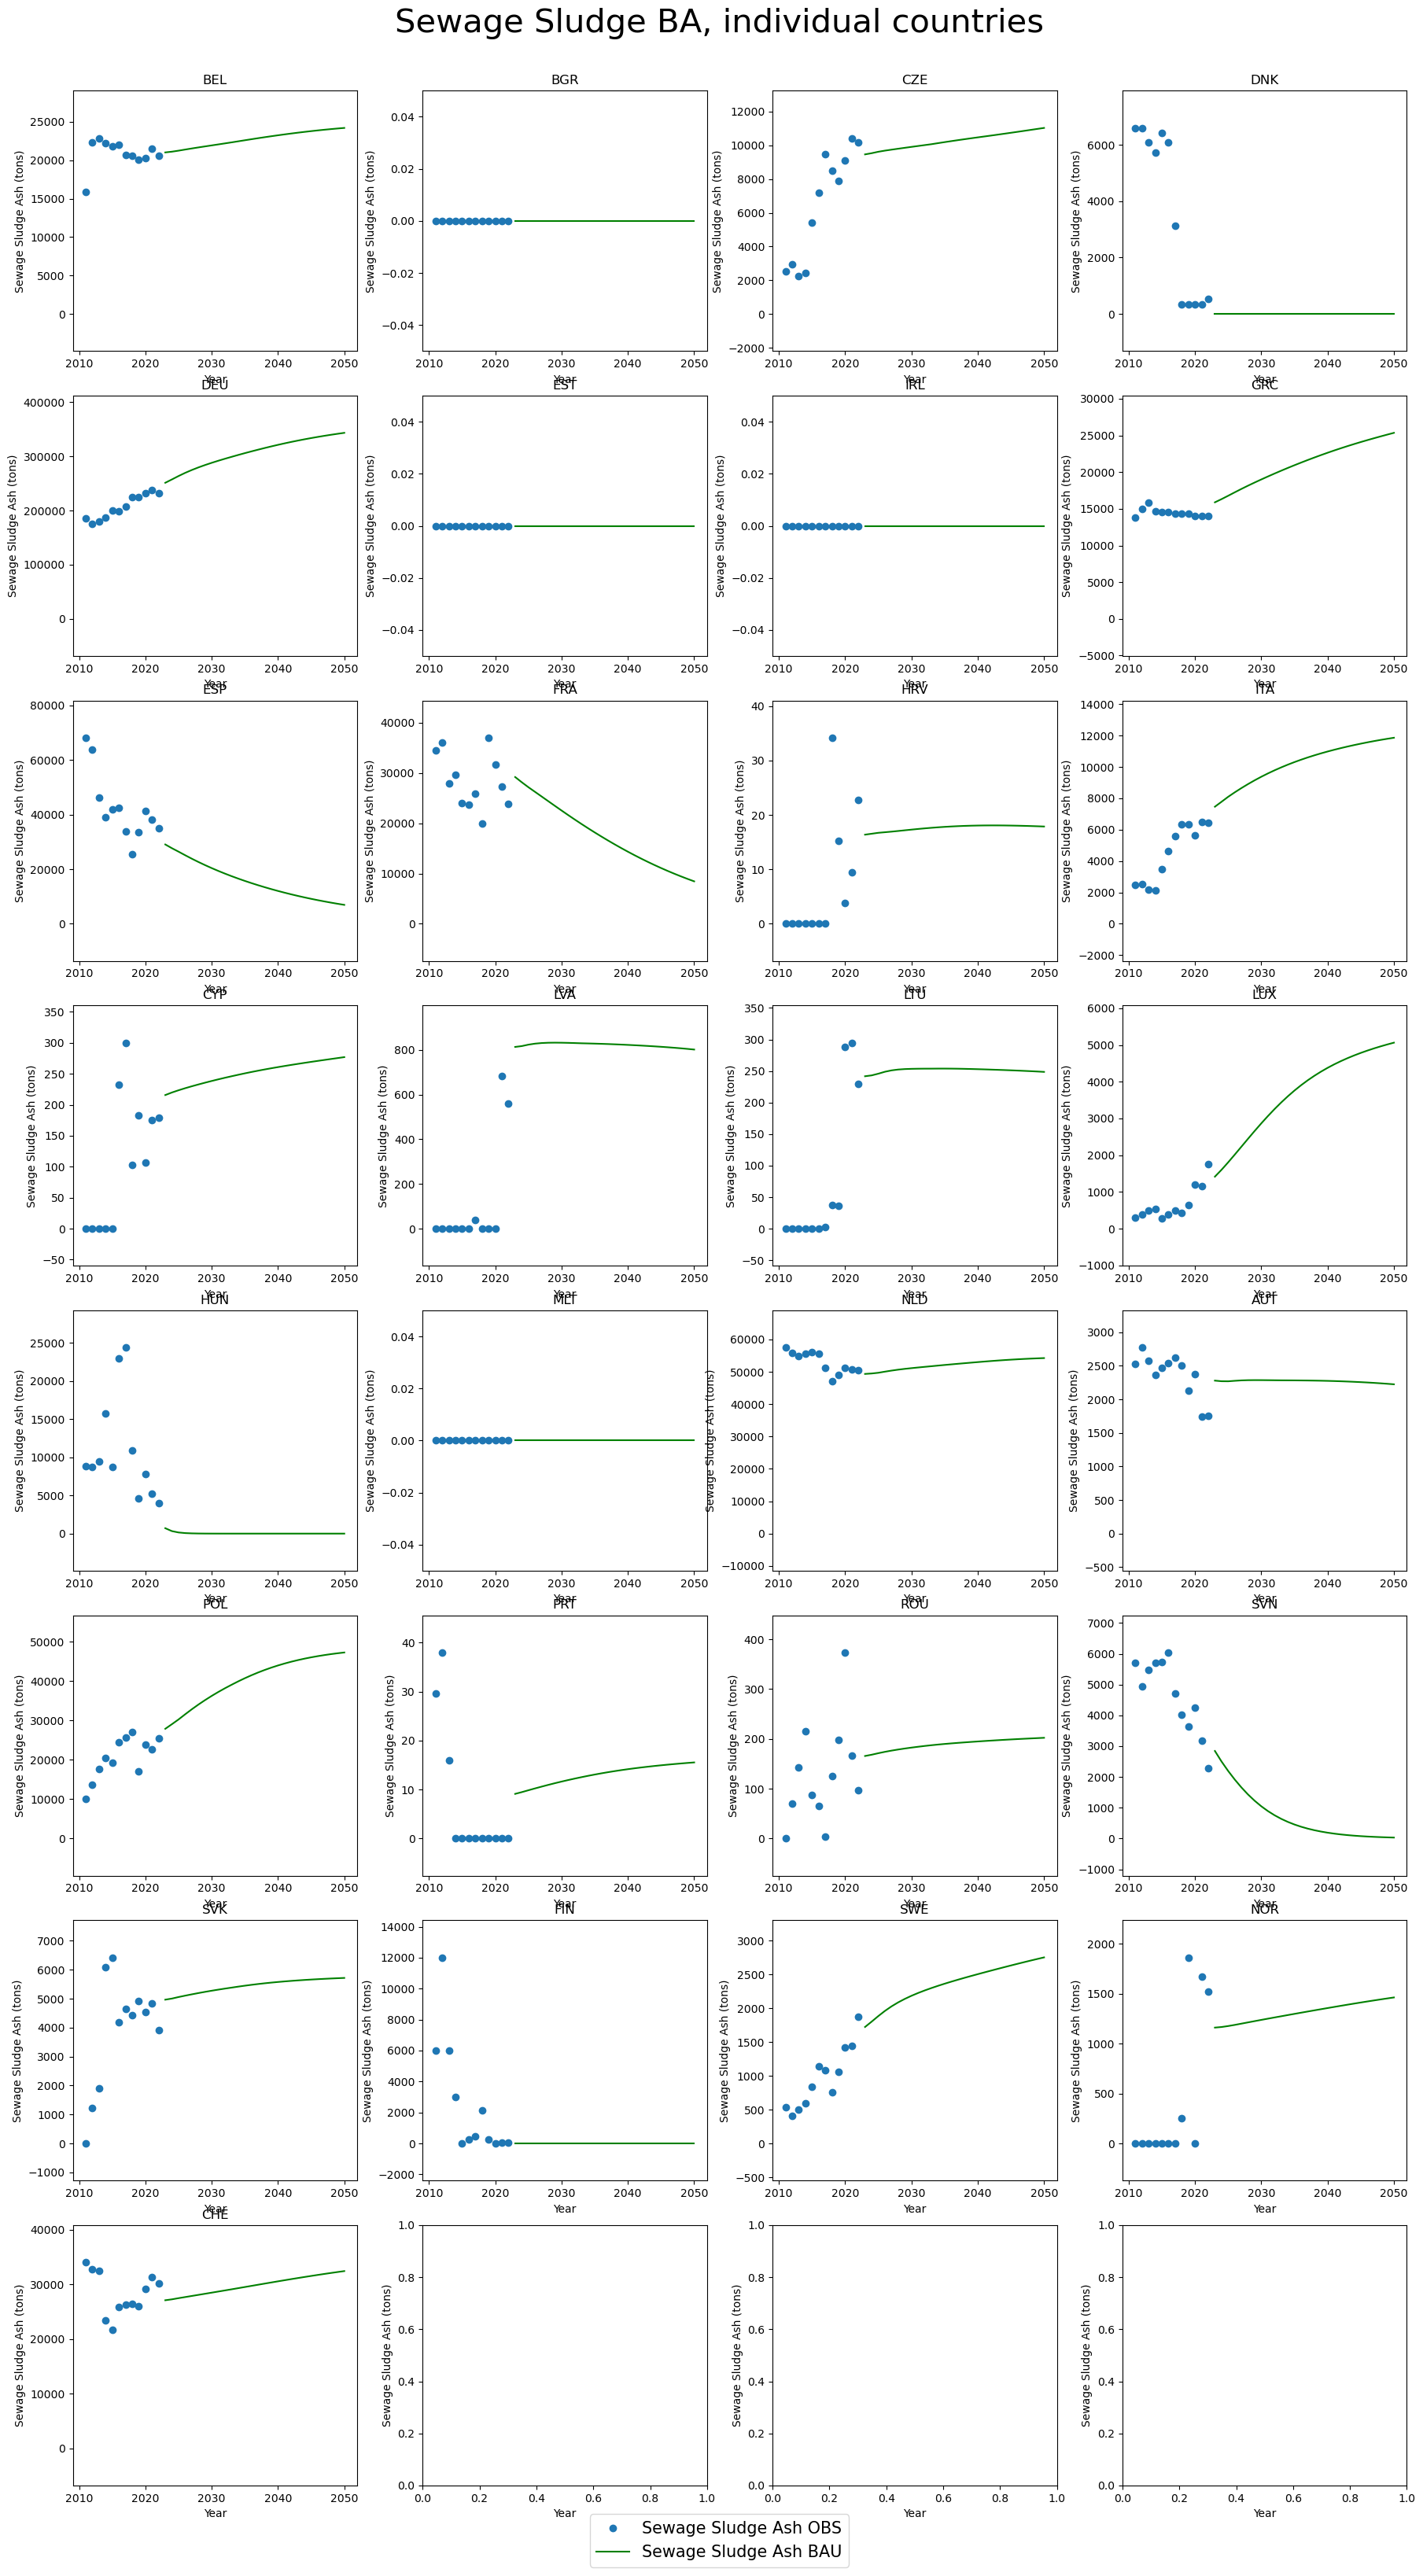

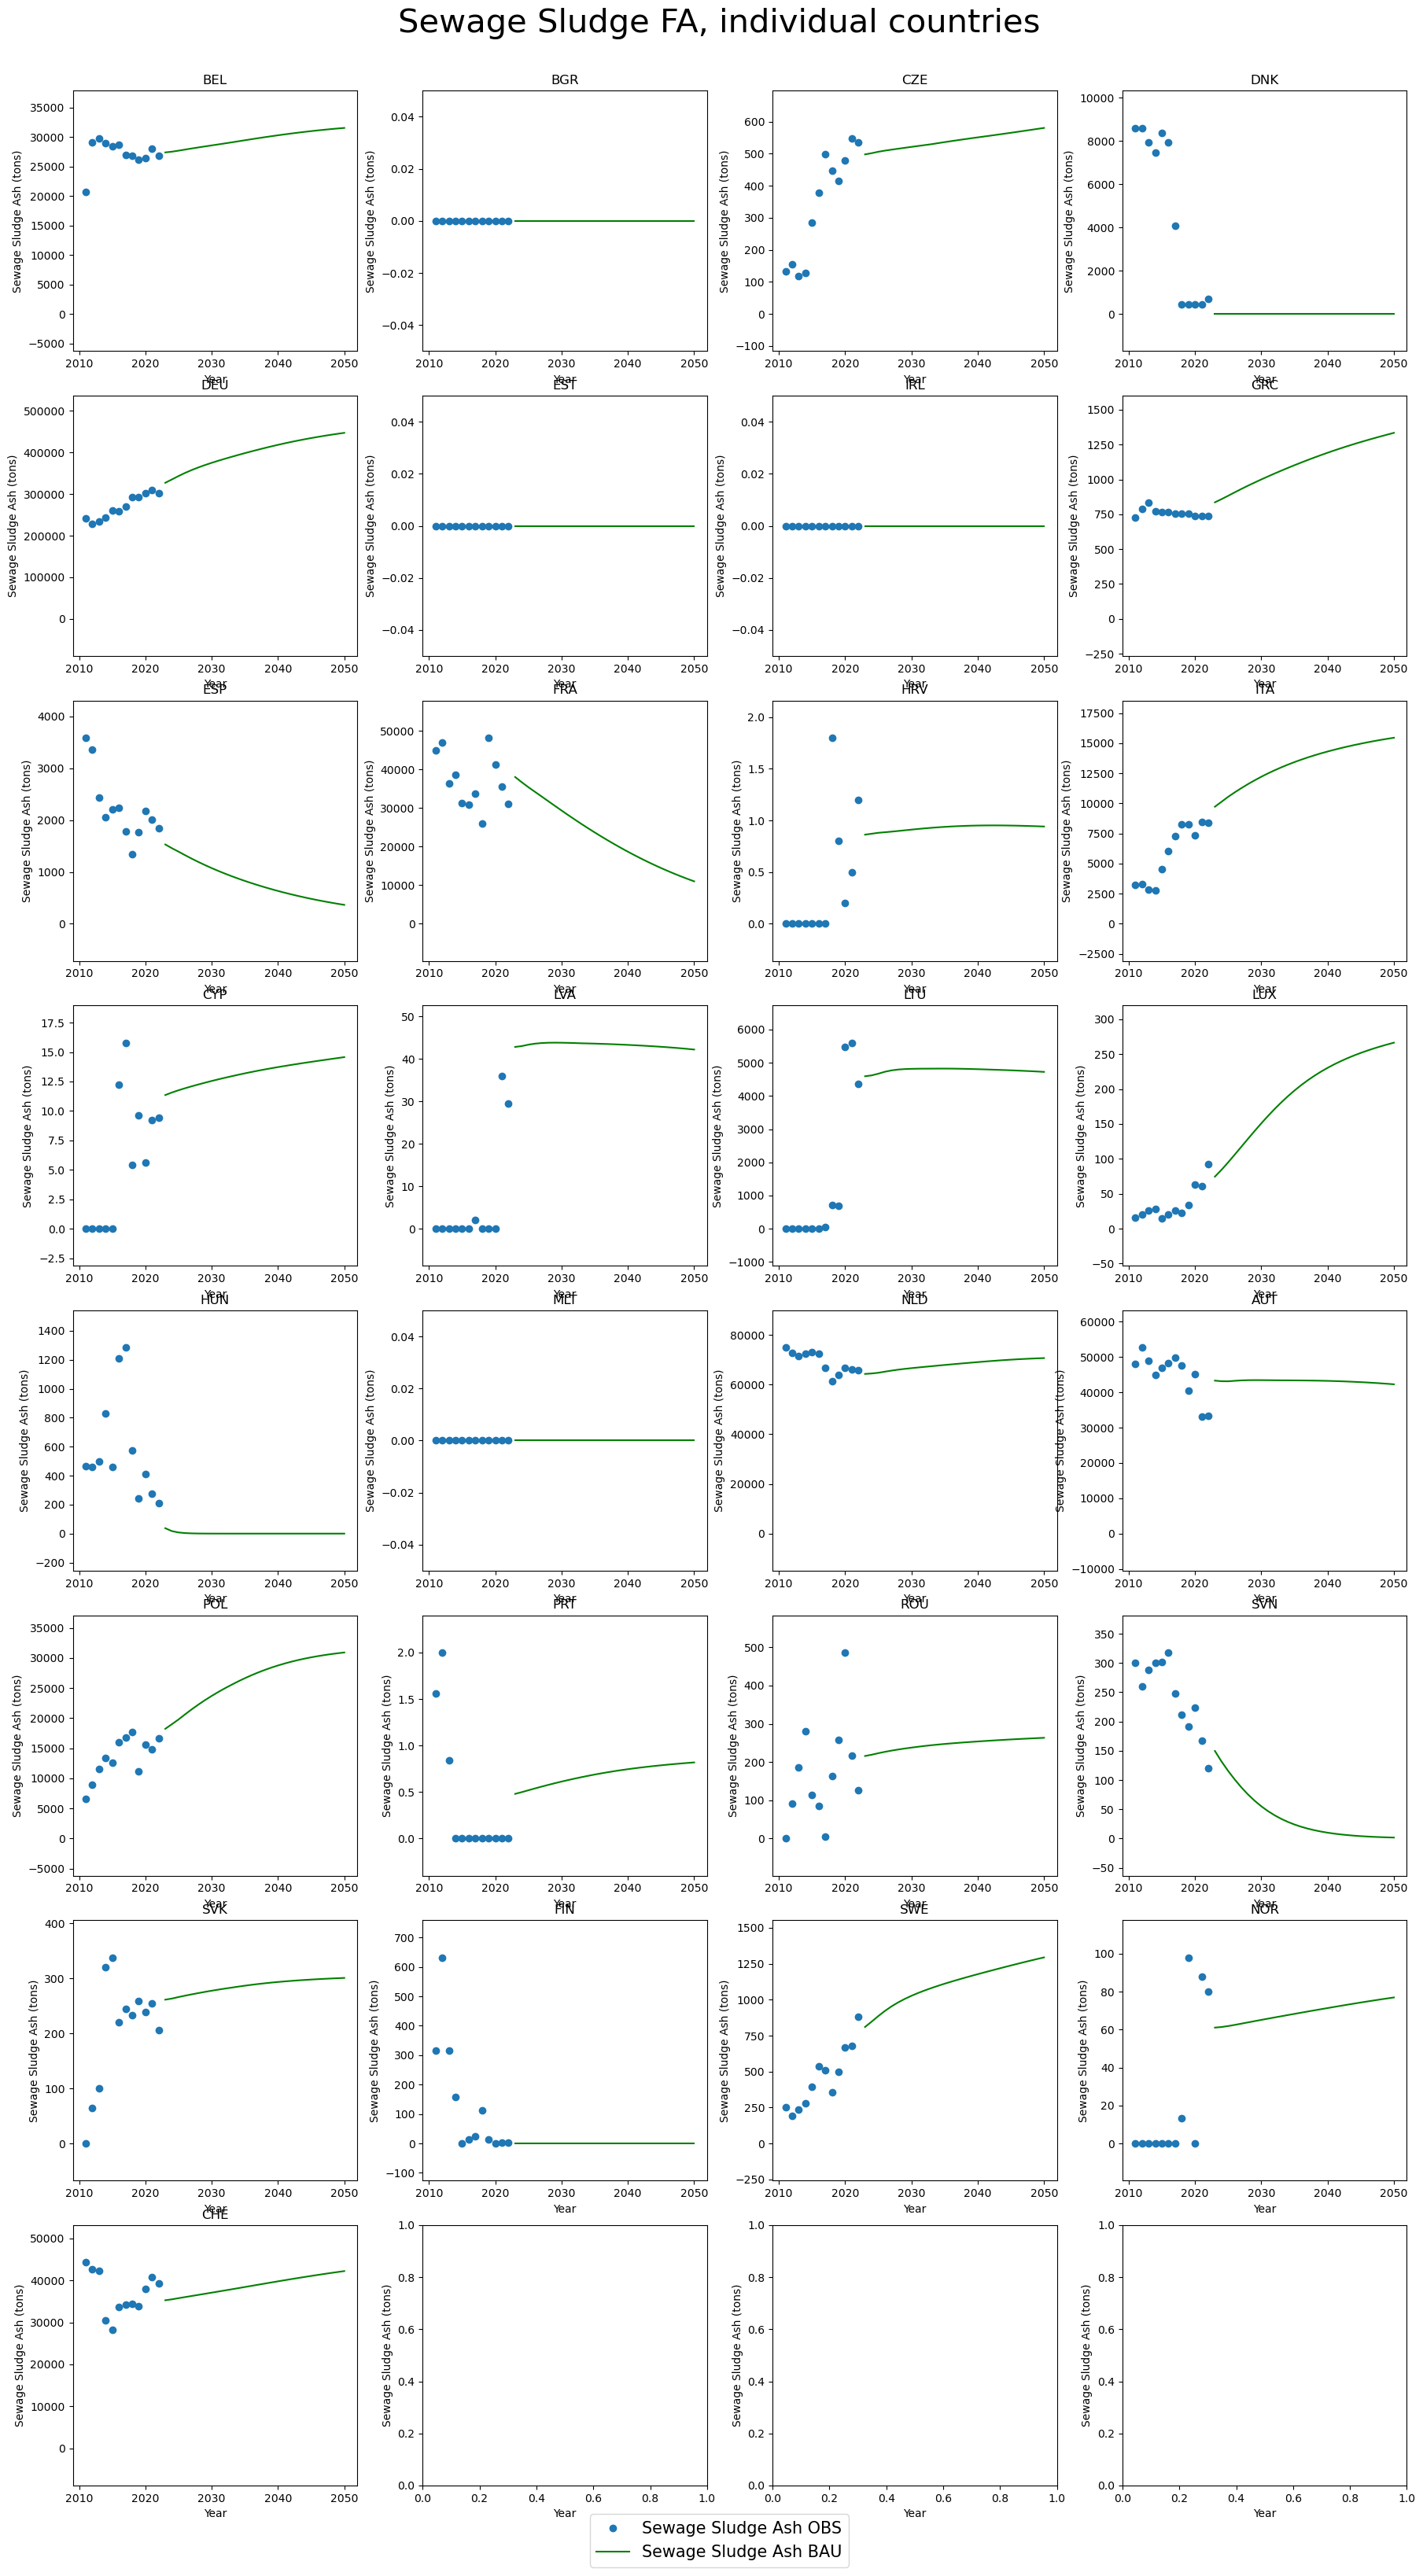

In [77]:
for ash_code in np.arange(1,3):
    if ash_code==1:
        code_data=all_data.loc[all_data['Substance_main_parent']=='19 01 12']
        name= 'BA'
    elif ash_code==2:
        code_data=all_data.loc[all_data['Substance_main_parent']=='19 01 14']
        name= 'FA'

    fig, axs = plt.subplots(8, 4, figsize=(20, 35))
    axs=axs.flatten()
    legend_handles = []
    legend_labels = ['Sewage Sludge Ash OBS', 'Sewage Sludge Ash BAU']

    i=0
    for region in bau_data['Location'].unique():
        reg_data = code_data.loc[code_data['Location']==region]
        obs=reg_data.loc[reg_data['Scenario']=='OBS']
        bau=reg_data.loc[reg_data['Scenario']=='BAU']
        lines = axs[i].plot(obs['Year'],obs['Value'],'o', label='Sewage sludge ash OBS', color = '#1f77b4')
        legend_handles.extend(lines)
        
        lines = axs[i].plot(bau['Year'],bau['Value'],'-', label='SS Ash BAU', color = 'green')
        legend_handles.extend(lines)


    
        #Setting limits of y axis
        y_min = 0
        y_max = max(bau['Value'].max(),obs['Value'].max())
        padding = (y_max - y_min) * 0.2  
        axs[i].set_ylim(y_min - padding, y_max + padding)

        axs[i].set_title(region)

        i+=1

    # Adjust layout to make space for legend and heading
    plt.tight_layout(rect=[0, 0, 0.9, 0.93])

    # Set axis labels for subplots
    for ax in axs:
        ax.set_xlabel('Year')
        ax.set_ylabel('Sewage Sludge Ash (tons)')

    # Add a common legend below the subplots
    fig.subplots_adjust(bottom=0.05)
    legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
    legend_subplot.axis('off')
    legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

    # Add title for the entire figure
    title = fig.suptitle('Sewage Sludge '+name+', individual countries', fontsize=30)
    title.set_position([0.45, 0.95])

    plt.show()

In [87]:
bau_data

Waste Stream Location  Year Scenario Substance_main_parent  \
0           SLASH      BEL  2023      BAU              19 01 12   
1           SLASH      BEL  2024      BAU              19 01 12   
2           SLASH      BEL  2025      BAU              19 01 12   
3           SLASH      BEL  2026      BAU              19 01 12   
4           SLASH      BEL  2027      BAU              19 01 12   
...           ...      ...   ...      ...                   ...   
1619        SLASH      CHE  2046      BAU              19 01 14   
1620        SLASH      CHE  2047      BAU              19 01 14   
1621        SLASH      CHE  2048      BAU              19 01 14   
1622        SLASH      CHE  2049      BAU              19 01 14   
1623        SLASH      CHE  2050      BAU              19 01 14   

     additionalSpecification                         Stock/Flow ID  \
0                        NaN  SLASH_ashesEnergyProductionGenerated   
1                        NaN  SLASH_ashesEnergyProductionGenerated   
2                        NaN  SLASH_ashesEnergyProductionGenerated   
3                        NaN  SLASH_ashesEnergyProductionGenerated   
4                        NaN  SLASH_ashesEnergyProductionGenerated   
...                      ...                                   ...   
1619                     NaN  SLASH_ashesEnergyProductionGenerated   
1620                     NaN  SLASH_ashesEnergyProductionGenerated   
1621                     NaN  SLASH_ashesEnergyProductionGenerated   
1622                     NaN  SLASH_ashesEnergyProductionGenerated   
1623                     NaN  SLASH_ashesEnergyProductionGenerated   

             Value Unit Data Quality  \
0      2628.840730   Mg            4   
1      2640.865044   Mg            4   
2      2657.268405   Mg            4   
3      2675.419967   Mg            4   
4      2693.105452   Mg            4   
...            ...  ...          ...   
1619  39857.185400   Mg            4   
1620  40086.439165   Mg            4   
1621  40309.973827   Mg            4   
1622  40527.566485   Mg            4   
1623  40739.372442   Mg            4   

                                       Reference        Remark 1 (Method)  \
0     20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
1     20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
2     20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
3     20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
4     20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
...                                          ...                      ...   
1619  20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
1620  20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
1621  20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
1622  20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   
1623  20231106_Milestone18.docx (sharepoint.com)  Estimated by Regression   

     Remarks 2 Remark 3 - who put in the data Remark 4  
0          NaN                         Sowmya      NaN  
1          NaN                         Sowmya      NaN  
2          NaN                         Sowmya      NaN  
3          NaN                         Sowmya      NaN  
4          NaN                         Sowmya      NaN  
...        ...                            ...      ...  
1619       NaN                         Sowmya      NaN  
1620       NaN                         Sowmya      NaN  
1621       NaN                         Sowmya      NaN  
1622       NaN                         Sowmya      NaN  
1623       NaN                         Sowmya      NaN  

[1624 rows x 15 columns]